In [2]:
# Data Analysis
import pandas as pd
import numpy as np
import math
import scipy.stats as stats

# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib.patches import Ellipse

import os

mpl.rcParams['figure.dpi'] = 300

#### Read input data (clusters defined in 02 and 03)

In [2]:
samples = {}

for file in os.listdir("./") :
    
    if file.endswith(".clusters.LOH.pkl.bz2") :
        s = file.split(".")
        samples[s[0]] = os.path.abspath(file)

for sm, cluster_file in samples.items() :
    print(sm, cluster_file)

H5A2 /mnt/urbe2/disk3/Antoine/2023-08-28_Analysis_GR_ME/H5A2.clusters.LOH.pkl.bz2
D2C1 /mnt/urbe2/disk3/Antoine/2023-08-28_Analysis_GR_ME/D2C1.clusters.LOH.pkl.bz2
P250_C17_E3 /mnt/urbe2/disk3/Antoine/2023-08-28_Analysis_GR_ME/P250_C17_E3.clusters.LOH.pkl.bz2
H2C3 /mnt/urbe2/disk3/Antoine/2023-08-28_Analysis_GR_ME/H2C3.clusters.LOH.pkl.bz2
D5C1 /mnt/urbe2/disk3/Antoine/2023-08-28_Analysis_GR_ME/D5C1.clusters.LOH.pkl.bz2
P250_C17_E4 /mnt/urbe2/disk3/Antoine/2023-08-28_Analysis_GR_ME/P250_C17_E4.clusters.LOH.pkl.bz2
H3C4 /mnt/urbe2/disk3/Antoine/2023-08-28_Analysis_GR_ME/H3C4.clusters.LOH.pkl.bz2
P0_C9_E4 /mnt/urbe2/disk3/Antoine/2023-08-28_Analysis_GR_ME/P0_C9_E4.clusters.LOH.pkl.bz2
D2A1 /mnt/urbe2/disk3/Antoine/2023-08-28_Analysis_GR_ME/D2A1.clusters.LOH.pkl.bz2
P250_C8_E4 /mnt/urbe2/disk3/Antoine/2023-08-28_Analysis_GR_ME/P250_C8_E4.clusters.LOH.pkl.bz2
30H_C48_E5 /mnt/urbe2/disk3/Antoine/2023-08-28_Analysis_GR_ME/30H_C48_E5.clusters.LOH.pkl.bz2
D2B3 /mnt/urbe2/disk3/Antoine/2023-08-

#### Metadata

In [3]:
sample_exp = {
    "D2A1": "ME",
    "D3A1": "ME",
    "D4A3": "ME",
    "D5B3": "ME",
    "D2B3": "ME", # has a 50G
    "D5C3": "ME", # has a 50G
    "D2C1": "ME", # has a 50G
    "D2C3": "ME", # has a 50G
    "D3A3": "ME",  # has a 50G
    "D4B4": "ME", # has a 50G
    "D5C1": "ME", # has a 50G
    "H2A3": "ME",
    "H2C3": "ME",
    "H4C2": "ME",
    "H5A3": "ME",
    "H4A4": "ME", # has a 50G
    "H5A2": "ME", # has a 50G
    "H2B4": "ME", # has a 50G
    "H3A4": "ME", # has a 50G
    "H3C4": "ME", # has a 50G
    "H5A4": "ME", # has a 50G
    "H5C2": "ME", # has a 50G
    "30H_C36_E5": "GR",
    "30H_C3_E5":  "GR",
    "30H_C48_E5": "GR",
    "30H_C3_E4":  "GR",
    "30D_C52_E5": "GR",
    "30D_C38_E4": "GR",
    "30D_C13_E3": "GR",
    "30D_C38_E5": "GR",
    "P0_C27_E5":  "GR",
    "P0_C9_E5":   "GR",
    "P0_C9_E4":   "GR",
    "P0_C40_E5":  "GR",
    "P100_C8_E4": "GR",
    "P100_C30_E4":"GR",
    "P100_C8_E3": "GR",
    "P100_C30_E3":"GR",
    "P250_C8_E3": "GR",
    "P250_C17_E4":"GR",
    "P250_C8_E4": "GR",
    "P250_C17_E3":"GR",
    "P500_C16_E5":"GR",
    "P500_C16_E4":"GR",
    "P500_C30_E3":"GR",
    "P500_C18_E3":"GR",
}

generations = {
    "D2A1": 86,
    "D3A1": 87,
    "D4A3": 82,
    "D5B3": 83,
    "D2B3": 84, # has a 50G
    "D5C3": 81, # has a 50G
    "D2C1": 79, # has a 50G
    "D2C3": 75, # has a 50G
    "D3A3": 84,  # has a 50G
    "D4B4": 87, # has a 50G
    "D5C1": 79, # has a 50G
    "H2A3": 117,
    "H2C3": 122,
    "H4C2": 128,
    "H5A3": 128,
    "H4A4": 118, # has a 50G
    "H5A2": 132, # has a 50G
    "H2B4": 119, # has a 50G
    "H3A4": 129, # has a 50G
    "H3C4": 133, # has a 50G
    "H5A4": 131, # has a 50G
    "H5C2": 125, # has a 50G
    "30H_C36_E5": 1,
    "30H_C3_E5":  1,
    "30H_C48_E5": 1,
    "30H_C3_E4":  1,
    "30D_C52_E5": 1,
    "30D_C38_E4": 1,
    "30D_C13_E3": 1,
    "30D_C38_E5": 1,
    "P0_C27_E5":  1,
    "P0_C9_E5":   1,
    "P0_C9_E4":   1,
    "P0_C40_E5":  1,
    "P100_C8_E4": 1,
    "P100_C30_E4":1,
    "P100_C8_E3": 1,
    "P100_C30_E3":1,
    "P250_C8_E3": 1,
    "P250_C17_E4":1,
    "P250_C8_E4": 1,
    "P250_C17_E3":1,
    "P500_C16_E5":1,
    "P500_C16_E4":1,
    "P500_C30_E3":1,
    "P500_C18_E3":1,
}

sample_cond = {
    "30H_C36_E5": "30H",
    "30H_C3_E5":  "30H",
    "30H_C48_E5": "30H",
    "30H_C3_E4":  "30H",
    "30D_C52_E5": "30D",
    "30D_C38_E4": "30D",
    "30D_C13_E3": "30D",
    "30D_C38_E5": "30D",
    "P0_C27_E5":  "0Gy",
    "P0_C9_E5":   "0Gy",
    "P0_C9_E4":   "0Gy",
    "P0_C40_E5":  "0Gy",
    "P100_C8_E4": "100Gy",
    "P100_C30_E4":"100Gy",
    "P100_C8_E3": "100Gy",
    "P100_C30_E3":"100Gy",
    "P250_C8_E3": "250Gy",
    "P250_C17_E4":"250Gy",
    "P250_C8_E4": "250Gy",
    "P250_C17_E3":"250Gy",
    "P500_C16_E5":"500Gy",
    "P500_C16_E4":"500Gy",
    "P500_C30_E3":"500Gy",
    "P500_C18_E3":"500Gy",
    "D4A3": "D", # MA
    "D2B3": "D",
    "D5B3": "D",
    "D3A1": "D",
    "D2A1": "D",
    "D5C3": "D",
    "D2C1": "D",
    "D2C3": "D",
    "D3A3": "D",
    "D4B4": "D",
    "D5C1": "D",
    "H2A3": "H",
    "H4A4": "H",
    "H2C3": "H",
    "H5A3": "H",
    "H4C2": "H",
    "H5A2": "H",
    "H2B4": "H",
    "H3A4": "H",
    "H3C4": "H",
    "H5A4": "H",
    "H5C2": "H",
}

conditions_colors = {
    "30H": (0.0,0.0,1.0,0.8), # blue
    "30H_del": (0.0,0.7,1.0,0.25), # turquoise
    "30D": (1.0,0.5,0.0,0.8), # orangered
    "30D_del": (1.0,0.75,0.0,0.25), # orange
    "0Gy": (0.5,0.5,0.5,0.8), # dark grey
    "0Gy_del": (0.7,0.7,0.7,0.25), # lighter grey
    "100Gy": (0.7,0.0,0.6,0.8), # purple
    "100Gy_del": (1.0,0.0,0.8,0.25), # pinkish
    "250Gy": (0.0,0.75,0.0,0.8), # darkgreen
    "250Gy_del": (0.0,1.0,0.0,0.25), # limegreen
    "500Gy": (1.0,0.0,0.0,0.8), # red
    "500Gy_del": (1.0,0.5,0.5,0.25), # pink
    "H": (0.0,0.0,1.0,0.8),
    "H_del": (0.0,0.7,1.0,0.25),
    "D": (1.0,0.25,0.0,0.8),
    "D_del": (1.0,0.75,0.0,0.25),
}

conditions_cmap = {
    "30H":cm.Blues,
    "30D":cm.Oranges,
    "0Gy":cm.Greys,
    "100Gy":cm.Purples,
    "250Gy":cm.Greens,
    "500Gy":cm.Reds,
    "H":cm.Blues,
    "D":cm.Oranges,
}

conditions_names = {
    "30H": "GR Hydrated",
    "30D": "GR Desiccated",
    "0Gy": "GR 0Gy IR",
    "100Gy": "GR 100Gy IR",
    "250Gy": "GR 250Gy IR",
    "500Gy": "GR 500Gy IR",
    "H": "ME Hydrated",
    "D": "ME Desiccated"
}

conditions_shape = {
    "30H": "o",
    "30D": "o",
    "0Gy": "o",
    "100Gy": "o",
    "250Gy": "o",
    "500Gy": "o",
    "H": "d",
    "D": "d"
}

# COVERAGE
median_coverage = {
    "ancestor": 341,
    "D2A1": 47,
    "D2B3": 264, # has a 50G
    "D2B3_50G": 408,
    "D2C1": 110, # has a 50G
    "D2C1_50G": 137,
    "D2C3": 106, # has a 50G
    "D2C3_50G": 118,
    "D3A1": 49,
    "D3A3": 105,  # has a 50G
    "D3A3_50G": 177,
    "D4A3": 54,
    "D4B4": 144, # has a 50G
    "D4B4_50G":176,
    "D5B3": 73,
    "D5C1": 120, # has a 50G
    "D5C1_50G": 127,
    "D5C3": 156, # has a 50G
    "D5C3_50G": 194,
    "H2A3": 449,
    "H2B4": 122, # has a 50G
    "H2B4_50G": 27, # LOW COVERAGE SAMPLE
    "H2C3": 148,
    "H3A4": 90, # has a 50G
    "H3A4_50G": 150,
    "H3C4": 127, # has a 50G
    "H3C4_50G": 111,
    "H4A4": 409, # has a 50G
    "H4A4_50G": 404,
    "H4C2": 204,
    "H5A2": 54, # has a 50G
    "H5A2_50G": 63,
    "H5A3": 202,
    "H5A4": 126, # has a 50G
    "H5A4_50G": 131,
    "H5C2": 148, # has a 50G
    "H5C2_50G": 165,
    
    "30H_C3_E4":  199,
    "30H_C3_E5":  209,
    "30H_C36_E5": 244,
    "30H_C48_E5": 275,
    
    "30D_C13_E3": 259,
    "30D_C38_E4": 193,
    "30D_C38_E5": 236,
    "30D_C52_E5": 208,
    
    "P0_C9_E4":   186,
    "P0_C9_E5":   174,
    "P0_C27_E5":  242,
    "P0_C40_E5":  192,
    
    "P100_C8_E3": 413,
    "P100_C8_E4": 431,
    "P100_C30_E3":424,
    "P100_C30_E4":490,
    
    "P250_C8_E3": 390,
    "P250_C8_E4": 334,
    "P250_C17_E3":354,
    "P250_C17_E4":435,
    
    "P500_C16_E4":185,
    "P500_C16_E5":187,
    "P500_C18_E3":291,
    "P500_C30_E3":275,
}

col_ME = (55/255, 126/255, 184/255)
col_ARC = (255/255, 127/255, 0/255)
col_TE = (152/255, 78/255, 163/255, 0.65)

# LENGTHS OF CHROMOSOMES
reference = "/mnt/urbe2/disk3/Antoine/19-11-21_VariantCalling_ARC/input/reference.fa"
fai = "/mnt/urbe2/disk3/Antoine/19-11-21_VariantCalling_ARC/input/reference.fa.fai"
lengths = {}
for line in open(fai, 'r') :
    s = line.strip().split()
    lengths[s[0]] = int(s[1])

# TELOMERES
telomeres = {
    "Chrom_1":([0,1500000], [11000000, 18146847]),
    "Chrom_2":([0,2000000], [15000000, 16274841]),
    "Chrom_3":([0,4000000], [13500000, 20354777]),
    "Chrom_4":([0,1000000], [14000000, 15224634]),
    "Chrom_5":([0,5000000], [15500000, 16930519]),
    "Chrom_6":([0,2000000], [12000000, 13893210]),
}

# POSITIONS OF GENES, CDS AND REPEATS 
genes = "/mnt/urbe2/disk3/Antoine/19-11-21_VariantCalling_ARC/input/Avaga.genes.bed"
cds = "/mnt/urbe2/disk3/Antoine/19-11-21_VariantCalling_ARC/input/Avaga.CDS.bed"
repeats = "/mnt/urbe2/disk3/Antoine/19-11-21_VariantCalling_ARC/input/avaga.TEannotation.26-02-20.defragmentedDraftAnnot.bed"

# REPEATS DATAFRAME
reps = {"CHR":[], "START":[], "END":[]}
for line in open(repeats, "r") :
    s = line.strip().split("\t")
    reps["CHR"].append(s[0])
    reps["START"].append(int(s[1]))
    reps["END"].append(int(s[2]))
    
repdf = pd.DataFrame().from_dict(reps)

In [4]:
gene_df = pd.read_csv(genes, sep="\t", names=["CHR", "START", "END", "INFO"])
gene_df

,CHR,START,END,INFO
0,Chrom_1,2155,5638,gene
1,Chrom_1,9443,22451,gene
2,Chrom_1,31120,31192,gene
3,Chrom_1,37749,39478,gene
4,Chrom_1,40443,42340,gene
...,...,...,...,...
31577,Chrom_6,13878012,13879325,gene
31578,Chrom_6,13880772,13881455,gene
31579,Chrom_6,13881782,13882003,gene
31580,Chrom_6,13886437,13888282,gene


# Merging clusters informations:

- Min 25% of average coverage of the whole sample <- no LOH due to low coverage
- Max 2 samples sharing LOH on average
- If distance between 2 clusters <= 100 : **consider as only one cluster**
- Minimum 5 SNPs <- no LOH due to independent assortment

In [5]:
min_snps = 4 # < 4 <=> <= 5
min_cov_perc = 0.25
max_share = 2
max_distance_between_cluster = 100

all_clusters_merged = {}
all_dfs = {}

for sample, csr_f in samples.items() :
    
    df = pd.read_pickle(csr_f)
    df.columns = ['_'.join(col).strip() for col in df.columns.values]
    #clusters = df.loc[(df["SH", "mean"] < max_share) & (df["ODP", "mean"] >= min_cov_perc*median_coverage[sample]) & (df["GET", "first"] == "L")]
    mn_cv = min_cov_perc*median_coverage[sample]
    clusters = df.query("SH_mean < @max_share & ODP_mean >= @mn_cv & GET_first == 'L'", engine="python")
    
    all_dfs[sample] = clusters
    
    gb = clusters.groupby(by="CHROM_first", observed=True)
    
    modified = []
    for tup in gb :
        (i, cdf) = tup
        delta = []
        previous = None
        for n, row in cdf.iterrows() :
            if previous is not None :
                diff = row["POS_first"] - previous
                delta.append(diff)
                previous = row["POS_last"]
            else :
                delta.append(0)
                previous = row["POS_last"]
        cdf = cdf.assign(DELTA=delta)
        cdf["GROUP"] = cdf["DELTA"].gt(max_distance_between_cluster).cumsum()

        cdf = cdf.groupby("GROUP", observed=True).agg({"CHROM_first":"first", "POS_first":"min", "POS_last":"max", "ADP_min":"min", "ADP_max":"max", "ADP_mean":"mean", "ODP_min":"min", "ODP_max":"max", "ODP_mean":"mean", "GET_first":"first","GET_size":"sum","SH_min":"min","SH_max":"max","SH_mean":"mean"})
        cdf = cdf.assign(SIZE=cdf.apply(lambda x: x["POS_last"]-x["POS_first"]+1, axis="columns"))
        modified.append(cdf)

    gdf = pd.concat(modified)
    gdf = gdf.assign(OPER=gdf.apply(lambda x: (x["ODP_mean"]/median_coverage[sample])*100, axis="columns"))
    gdf = gdf.assign(APER=gdf.apply(lambda x: (x["ADP_mean"]/median_coverage["ancestor"])*100, axis="columns"))
    gdf = gdf.assign(DIFF=gdf.apply(lambda x: x["OPER"]-x["APER"], axis="columns"))
    gdf = gdf.query("GET_size > @min_snps")
    all_clusters_merged[sample] = gdf

In [6]:
# Get per-sample LOH count in clusters
max_share = 2
for sample, csr_f in samples.items() :
    if not sample.startswith("P500"):
        continue
    df = pd.read_pickle(csr_f)
    df.columns = ['_'.join(col).strip() for col in df.columns.values]
    unfiltered = df.query("SH_mean < @max_share & GET_first == 'L'", engine="python")
    #display(unfiltered.head())
    print(sample, np.sum(unfiltered["GET_size"]))

P500_C18_E3 36940
P500_C16_E5 3593
P500_C16_E4 3568
P500_C30_E3 22498


### Checks

In [14]:
print("data", [22498, 36940, 3593, 3568])
print("mean", np.mean([22498, 36940, 3593, 3568]))

data [22498, 36940, 3593, 3568]
mean 16649.75


In [7]:
all_clusters_merged["H2B4"].query("CHROM_first == 'Chrom_6' & GET_size < 700") # & POS_first > 4000000")

,CHROM_first,POS_first,POS_last,ADP_min,ADP_max,ADP_mean,ODP_min,ODP_max,ODP_mean,GET_first,GET_size,SH_min,SH_max,SH_mean,SIZE,OPER,APER,DIFF
GROUP,,,,,,,,,,,,,,,,,,
5,Chrom_6,592227,592575,457,595,491.75,160,202,169.75,L,8,1,2,1.125,349,139.139344,144.208211,-5.068867
21,Chrom_6,3939697,3939787,357,390,375.6,108,117,111.05,L,16,1,1,1.0,91,91.024590,110.146628,-19.122037
24,Chrom_6,4519078,4519184,178,236,201.0,76,85,80.833333,L,6,1,2,1.666667,107,66.256831,58.944282,7.312549
35,Chrom_6,6135316,6135356,194,223,208.8,68,74,71.2,L,5,0,0,0.0,41,58.360656,61.231672,-2.871016
39,Chrom_6,7122186,7122269,280,291,284.714286,62,67,64.285714,L,7,1,2,1.285714,84,52.693208,83.493925,-30.800717
62,Chrom_6,12117085,12117129,143,154,149.75,67,77,74.0,L,6,0,0,0.0,45,60.655738,43.914956,16.740782
72,Chrom_6,13044536,13044612,195,237,228.111111,50,58,53.777778,L,9,1,7,1.777778,77,44.080146,66.894754,-22.814608
74,Chrom_6,13234698,13235045,79,205,132.304348,30,65,38.913043,L,23,1,2,1.043478,348,31.895937,38.798929,-6.902992
80,Chrom_6,13335149,13335195,92,96,93.727273,39,44,41.909091,L,12,0,3,1.318182,47,34.351714,27.486004,6.865710


In [8]:
all_clusters_merged["D5C3"].query("CHROM_first == 'Chrom_6' & POS_first < 3500000") # & POS_first > 4000000")

/tmp/ipykernel_37565/391416061.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  all_clusters_merged["D5C3"].query("CHROM_first == 'Chrom_6' & POS_first < 3500000") # & POS_first > 4000000")


,CHROM_first,POS_first,POS_last,ADP_min,ADP_max,ADP_mean,ODP_min,ODP_max,ODP_mean,GET_first,GET_size,SH_min,SH_max,SH_mean,SIZE,OPER,APER,DIFF
GROUP,,,,,,,,,,,,,,,,,,
5,Chrom_6,172238,194930,87,306,213.216627,26,192,104.366353,L,545,0,19,1.247843,22693,66.901508,62.526870,4.374638
7,Chrom_6,210951,214881,102,257,206.466667,69,132,102.571429,L,105,1,6,1.152381,3931,65.750916,60.547410,5.203506
9,Chrom_6,215270,218597,97,294,192.910714,79,119,102.517857,L,56,1,3,1.035714,3328,65.716575,56.572057,9.144518
10,Chrom_6,259681,265093,156,326,229.621762,69,141,108.476684,L,193,1,3,1.129534,5413,69.536336,67.337760,2.198576
11,Chrom_6,284080,284680,125,243,202.688312,87,112,101.090909,L,77,1,2,1.051948,601,64.801865,59.439388,5.362477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Chrom_6,2976834,2980464,63,353,267.478788,105,192,165.007576,L,73,0,3,1.0,3631,105.774087,78.439527,27.334560
226,Chrom_6,2980578,2983037,172,394,340.81746,133,269,233.396825,L,66,0,1,0.97619,2460,149.613350,99.946469,49.666880
228,Chrom_6,2985510,2986897,265,342,307.046512,127,196,155.069767,L,43,0,1,0.953488,1388,99.403697,90.042965,9.360732


In [9]:
all_clusters_merged["D5C3"].query("CHROM_first == 'Chrom_6' & POS_first > 3100000 & POS_last < 4100000") # & POS_first > 4000000")

/tmp/ipykernel_37565/1347011721.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  all_clusters_merged["D5C3"].query("CHROM_first == 'Chrom_6' & POS_first > 3100000 & POS_last < 4100000") # & POS_first > 4000000")


,CHROM_first,POS_first,POS_last,ADP_min,ADP_max,ADP_mean,ODP_min,ODP_max,ODP_mean,GET_first,GET_size,SH_min,SH_max,SH_mean,SIZE,OPER,APER,DIFF
GROUP,,,,,,,,,,,,,,,,,,
234,Chrom_6,3781928,3810511,201,362,297.201794,106,212,160.818386,L,446,0,12,1.085202,28584,103.088709,87.155951,15.932758
237,Chrom_6,3812724,3856854,133,388,284.924331,107,233,160.608847,L,859,0,3,0.990687,44131,102.954389,83.555522,19.398867
238,Chrom_6,3859401,3900004,109,454,294.836207,101,216,159.431034,L,696,1,2,1.005747,40604,102.199381,86.462231,15.737150


### Figure 1c (example)

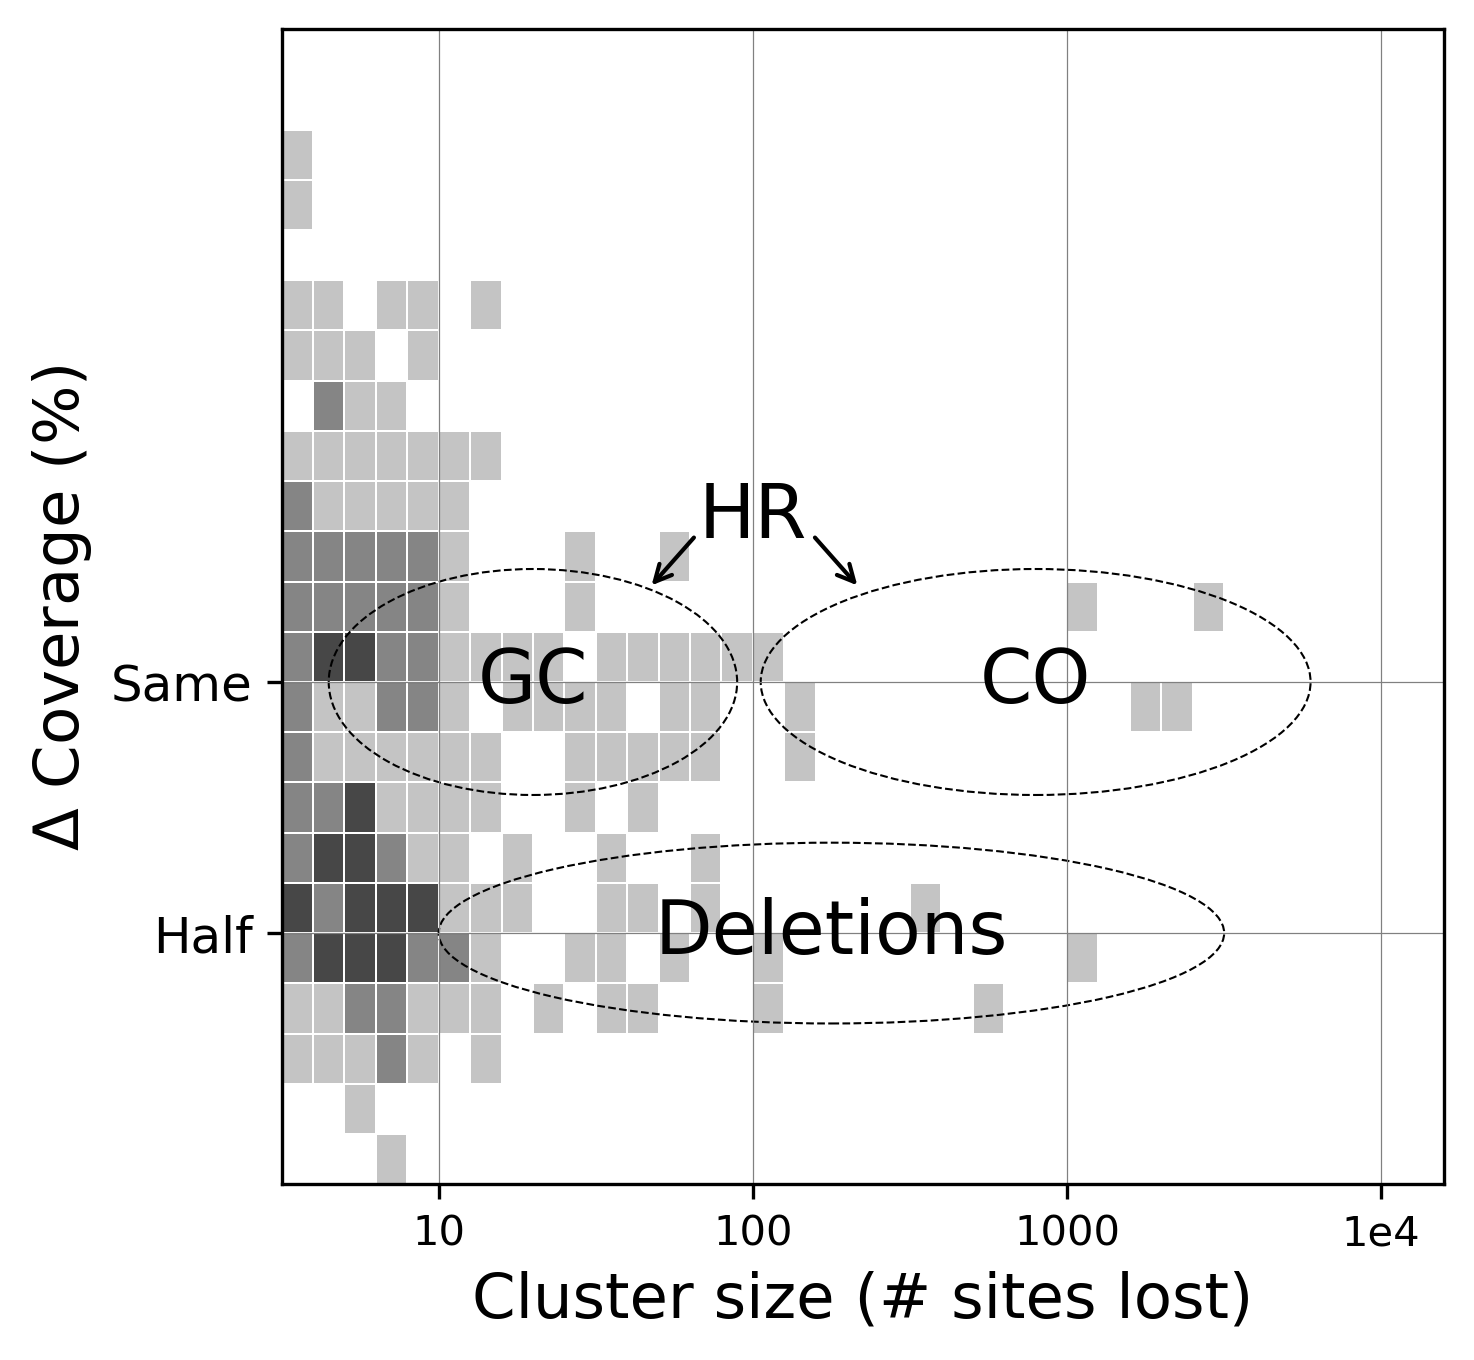

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5),)

#ax2 = ax.twiny()

#mu, sigma = 100, 15
#y = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#x = stats.norm.pdf(y, mu, sigma)
#ax2.plot(x, y, color="k", lw=1.5, linestyle="--", zorder=2)
###ax2.fill_betweenx(y, x, 0, facecolor=(0/255, 158/255, 115/255, 0.3), lw=0.5, edgecolor=(0, 0, 0), label="HR")

#mu, sigma = 50, 15
#y = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#x = stats.norm.pdf(y, mu, sigma)
#ax2.plot(x, y, color="k", lw=1.5, linestyle="--", zorder=2)
###ax2.fill_betweenx(y, x, 0, facecolor=(204/255, 121/255, 167/255, 0.3), lw=0.5,edgecolor=(0, 0, 0), label="Deletions")

#ax2.set_xlim(0.001, 0.027)
#ax2.set_xticks([])

data_size = np.concatenate(
    [
        np.random.normal(0,5,500), np.random.normal(0,5,300),
        np.random.normal(4,50,50), np.random.normal(4,50,30),
        np.random.normal(1000,1000,5), np.random.normal(1000,1000,3)
    ]
)

data_percent = np.concatenate(
    [
        np.random.normal(100,35,500), np.random.normal(50,15,300),
        np.random.normal(100,10,50), np.random.normal(50,10,30),
        np.random.normal(100,10,5), np.random.normal(50,10,3)
    ]
)

data_size = abs(data_size)
data_percent = abs(data_percent)

cmap = plt.cm.Greys  # define the colormap
cmaplist = [cmap(i) for i in range(32, cmap.N)] # extract all colors from the .jet map
cmaplist[0] = (1.0, 1.0, 1.0, 1.0) # force the first color entry to be white
mycmap = mpl.colors.LinearSegmentedColormap.from_list('My cmap', cmaplist, cmap.N)
bounds = [0, 1, 5, 10, 50, 100]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

counts, xedges, yedges, im = ax.hist2d(np.log10(data_size), data_percent,
                                       range=((0.5,4.2),(5,260)),
                                       bins=(np.arange(0.5,4.3,0.1),np.arange(0,260,10)),
                                       norm=norm, cmap=mycmap,
                                       ec="w", lw=0.1, zorder=1
                                       )

ax.set_ylim(0,230)
ax.set_yticks([50, 100])
ax.set_yticklabels(["Half","Same"], fontsize=12)
ax.set_ylabel(r"$\Delta$ Coverage (%)", fontsize=15)

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["10","100","1000","1e4"])
ax.set_xlabel("Cluster size (# sites lost)", fontsize=15)

#ax.set_ylim(0,250)
ax.set_xlim(0.5,4.2)
ax.set_facecolor((0.985,0.985,0.985))

for col in range(0,1) :
    for row in range(0,1) :
        for xpos in [1,2,3,4,5] :
            ax.plot([0,5],[100,100], color="grey", lw=0.25)
            ax.plot([0,5],[50,50], color="grey", lw=0.25)
            
            ax.vlines([1,2,3,4], ymin=0, ymax=260, color="grey", lw=0.25, zorder=2)

col_A = (55/255, 126/255, 184/255, 0.4)
col_B = (255/255, 127/255, 0/255, 0.4)
col_C = (152/255, 78/255, 163/255, 0.4)

#ax.annotate("GC", (1.1, 110), (1.5, 170), arrowprops=dict(fc='indianred', ec="k", lw=1.0, zorder=100), fontsize=16, zorder=100)
#ax.annotate("CO", (2.15, 110), (2.4, 170), arrowprops=dict(fc='indianred', ec="k", lw=1.0, zorder=100), fontsize=16, zorder=100)
#ax.annotate("Deletions", (2.4, 55), (2.9, 150), arrowprops=dict(fc='indianred', ec="k", lw=1.0, zorder=100), fontsize=16, zorder=100)
ax.text(x=2.0, y=133, s="HR", fontsize=18, ha='center', va='center')
ax.annotate("", xy=(1.66, 118), xytext=(1.83, 130), arrowprops=dict( arrowstyle="->", color="black", lw=1.0 ), zorder=10)
ax.text(x=1.3, y=100, s="GC", fontsize=18, ha='center', va='center')
ax.annotate("", xy=(2.35, 118), xytext=(2.18, 130), arrowprops=dict( arrowstyle="->", color="black", lw=1.0 ), zorder=10)
ax.text(x=2.9, y=100, s="CO", fontsize=18, ha='center', va='center')
ax.text(x=2.25, y=50, s="Deletions", fontsize=18, ha='center', va='center')

#text_ellipse = Ellipse((2.1, 175), width=1.3, height=28, alpha=0.33)
#ax.add_patch(text_ellipse)

hr_ellipse = Ellipse((1.3, 100), width=1.3, height=45, fc='none', ec='k', ls='dashed', lw=0.5)
ax.add_patch(hr_ellipse)

gc_ellipse = Ellipse((2.9, 100), width=1.75, height=45, fc='none', ec='k', ls='dashed', lw=0.5)
ax.add_patch(gc_ellipse)

del_ellipse = Ellipse((2.25, 50), width=2.5, height=36, fc='none', ec='k', ls='dashed', lw=0.5)
ax.add_patch(del_ellipse)

#ax2.legend(ncol=2, loc="upper center", frameon=False, fancybox=False,fontsize=14)

plt.show()

### Checks

In [6]:
min_size = 5

for sm, df in all_clusters_merged.items() :
    cond = sample_cond[sm]
    cdf = df.query("GET_size >= @min_size")
    break
cdf

,CHROM_first,POS_first,POS_last,ADP_min,ADP_max,ADP_mean,ODP_min,ODP_max,ODP_mean,GET_first,GET_size,SH_min,SH_max,SH_mean,SIZE,OPER,APER,DIFF
GROUP,,,,,,,,,,,,,,,,,,
1,Chrom_1,18635,18730,152,178,165.444444,20,35,27.777778,L,18,0,5,1.611111,96,51.440329,48.517432,2.922897
4,Chrom_1,29752,29884,163,171,168.25,53,66,60.5,L,5,0,1,0.5,133,112.037037,49.340176,62.696861
6,Chrom_1,37373,37525,228,266,244.625,45,60,50.783333,L,24,0,5,0.583333,153,94.043210,71.737537,22.305673
9,Chrom_1,89553,90196,121,147,134.875,24,34,28.625,L,8,0,8,1.625,644,53.009259,39.552786,13.456473
14,Chrom_1,186115,186386,133,164,143.909091,15,41,24.545455,L,11,0,6,1.272727,272,45.454545,42.202079,3.252466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Chrom_6,13320961,13321109,267,316,291.085714,24,37,30.557143,L,18,1,3,1.2,149,56.587302,85.362380,-28.775078
223,Chrom_6,13371535,13371550,144,147,145.6,23,25,24.2,L,5,0,0,0.0,16,44.814815,42.697947,2.116868
228,Chrom_6,13508293,13508766,181,237,206.454545,20,33,25.454545,L,11,0,0,0.0,474,47.138047,60.543855,-13.405808


### Supp Figure dataset: Proportion of clusters in ME below 100 sites:

In [16]:
def get_proportion_in_conditions(clusters, conditions, min_size=5, print_values=True) :
    
    boxplot_data = {
        "numC":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "avSz":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "avBpSz":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "numDel":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "numLOH":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "avDelS":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "avDelBpSz":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "avLOHBpSz":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "DelBpSz":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "LOHBpSz":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "NumLar":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "avLarS":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "avLarBpSz":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "totalLOH":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "totalLOHbp":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
        "LOHDeletionbp":{"30H":[], "30D":[], "0Gy":[], "100Gy":[], "250Gy":[], "500Gy":[]},
    }

    ### VALUES FOR PRINTING
    # min_size = minimum number of sites # df should already be filtered for SH
    total_valid_clusters = 0
    total_size_in_num_of_site = 0

    large_clusters = 0
    not_deletions_large_clusters = 0
    size_in_num_of_site_in_large_clusters = 0

    large_cluster_threshold = 100
    
    deletion_clusters = 0
    all_deletion_clusters = 0
    size_in_num_of_site_in_deletions = 0
    
    deletion_threshold = -20
    cluster_sizes = []

    total_loh = 0
    loh_in_deletions = 0
    loh_out_deletions = 0

    total_loh_large = 0
    loh_in_deletions_large = 0
    loh_out_deletions_large = 0

    for sm, df in clusters.items() :
        
        cond = sample_cond[sm]
        if cond in conditions :
            cdf = df.query("GET_size >= @min_size")
            
            cluster_sizes += cdf["GET_size"].to_list()
            
            total_valid_clusters += len(cdf)
            total_size_in_num_of_site += cdf["GET_size"].sum()

            large_cdf = cdf.query("GET_size >= @large_cluster_threshold")
            large_clusters += len(large_cdf)
            size_in_num_of_site_in_large_clusters += large_cdf["GET_size"].sum()
            
            del_cdf = df.query("GET_size >= @large_cluster_threshold & DIFF <= @deletion_threshold")
            deletion_clusters += len(del_cdf)
            size_in_num_of_site_in_deletions += del_cdf["GET_size"].sum()

            large_non_del_cdf = df.query("GET_size >= @large_cluster_threshold & DIFF > @deletion_threshold")
            not_deletions_large_clusters += len(large_non_del_cdf) # large and NOT del
            
            small_del_cdf = cdf.query("DIFF <= @deletion_threshold") # all LOH > min size THAT ARE DELETIONS
            non_del_cdf = cdf.query("DIFF > @deletion_threshold") # all LOH > min size BUT NOT DELETIONS

            total_loh += cdf["SIZE"].sum()
            loh_in_deletions += small_del_cdf["SIZE"].sum()
            loh_out_deletions += non_del_cdf["SIZE"].sum()

            total_loh_large += large_cdf["SIZE"].sum() # large only
            loh_in_deletions_large += del_cdf["SIZE"].sum() # large and del
            loh_out_deletions_large += large_non_del_cdf["SIZE"].sum() # large and NOT del

            #N_large += len(large_cdf) # large only
            #N_deletions_large += len(del_cdf) # large and del
            
            
            all_deletion_clusters += len(small_del_cdf)
            
            if not print_values :
                boxplot_data["numC"][cond].append(len(cdf))
                boxplot_data["avSz"][cond] += cdf["GET_size"].to_list()
                boxplot_data["avBpSz"][cond] += cdf["SIZE"].to_list()

                boxplot_data["totalLOH"][cond].append( cdf["GET_size"].sum() )
                boxplot_data["totalLOHbp"][cond].append( cdf["SIZE"].sum() )
                boxplot_data["numLOH"][cond].append( len(non_del_cdf) )
                
                boxplot_data["numDel"][cond].append( len(small_del_cdf) )
                boxplot_data["avDelS"][cond] += small_del_cdf["GET_size"].to_list()
                boxplot_data["avDelBpSz"][cond] += small_del_cdf["SIZE"].to_list()
                boxplot_data["avLOHBpSz"][cond] += non_del_cdf["SIZE"].to_list()

                boxplot_data["DelBpSz"][cond].append(small_del_cdf["SIZE"].sum())
                boxplot_data["LOHBpSz"][cond].append(non_del_cdf["SIZE"].sum())
                
                boxplot_data["NumLar"][cond].append( len(large_cdf) )
                boxplot_data["avLarS"][cond] += large_cdf["GET_size"].to_list()
                boxplot_data["avLarBpSz"][cond] += large_cdf["SIZE"].to_list()
    
    if print_values :
        print("#LOH clusters: {}".format( total_valid_clusters ))
        print("#Large clusters: {}".format( large_clusters ))
        print("#Large deletions: {}".format( deletion_clusters ))
        print("#Large clusters NOT deletions: {}".format( not_deletions_large_clusters ))
        print("Average cluster size: {:.2f}".format(np.mean(cluster_sizes)))
        print("%Large clusters: {:.2f}".format( (large_clusters/total_valid_clusters)*100 ))
        print("%Small clusters: {:.2f}".format( ((total_valid_clusters-large_clusters)/total_valid_clusters)*100 ))
        print("Total LOH in num of sites loss: {}".format(total_size_in_num_of_site))
        print("Total LOH in large clusters: {}".format(size_in_num_of_site_in_large_clusters))
        print("Total LOH (cluster > min size) in bp: {}".format(total_loh))
        print("Total LOH in deletions (bp, delcov<20): {}".format(loh_in_deletions))
        print("Total LOH OUT deletions (bp): {}".format(loh_out_deletions))
        print("Total LOH large clusters in bp: {}".format(total_loh_large))
        print("Total LOH large clusters IN deletions (bp, delcov<20): {}".format(loh_in_deletions_large))
        print("Total LOH large clusters OUT deletions (bp): {}".format(loh_out_deletions_large))
        print("%Sites in large clusters: {:.2f}".format( (size_in_num_of_site_in_large_clusters/total_size_in_num_of_site)*100 ))
        print("%Total deletions: {:.2f}".format( (all_deletion_clusters/total_valid_clusters)*100 ))
        try :
            print("Total LOH in large deletions: {}".format(size_in_num_of_site_in_deletions))
            print("%large deletions: {:.2f}".format( (deletion_clusters/large_clusters)*100 ))
            print("%large LOH clusters (not deletions): {:.2f}".format( ((large_clusters-deletion_clusters)/large_clusters)*100 ))
            print("%Sites in deletions: {:.2f}".format( (size_in_num_of_site_in_deletions/total_size_in_num_of_site)*100 ))
        except :
            print("No clusters > {} sites found.".format(large_cluster_threshold))
    else :
        return boxplot_data

boxplot_data = get_proportion_in_conditions(all_clusters_merged, conditions=["30H","30D","0Gy","100Gy","250Gy","500Gy"], print_values=False)

print("ME samples")
get_proportion_in_conditions(all_clusters_merged, conditions=["H","D"], )
print("---")
print("ME H samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["H"], )
print("---")
print("ME D samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["D"], )
print("---")
print("GR samples")
get_proportion_in_conditions(all_clusters_merged, conditions=["30H","30D","0Gy","100Gy","250Gy","500Gy"], )
print("---")
print("GR 30H samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["30H"], )
print("---")
print("GR 30D samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["30D"], )
print("---")
print("GR IR (non 0) samples")
get_proportion_in_conditions(all_clusters_merged, conditions=["100Gy","250Gy","500Gy"], )
print("---")
print("GR P0 samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["0Gy"], )
print("---")
print("GR P100 samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["100Gy"], )
print("---")
print("GR P250 samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["250Gy"], )
print("---")
print("GR P500 samples only")
get_proportion_in_conditions(all_clusters_merged, conditions=["500Gy"], )
print("---")

ME samples
#LOH clusters: 5242
#Large clusters: 775
#Large deletions: 150
#Large clusters NOT deletions: 625
Average cluster size: 86.23
%Large clusters: 14.78
%Small clusters: 85.22
Total LOH in num of sites loss: 452002
Total LOH in large clusters: 387575
Total LOH (cluster > min size) in bp: 18715479
Total LOH in deletions (bp, delcov<20): 3167378
Total LOH OUT deletions (bp): 15548101
Total LOH large clusters in bp: 16659197
Total LOH large clusters IN deletions (bp, delcov<20): 2507293
Total LOH large clusters OUT deletions (bp): 14151904
%Sites in large clusters: 85.75
%Total deletions: 20.70
Total LOH in large deletions: 44052
%large deletions: 19.35
%large LOH clusters (not deletions): 80.65
%Sites in deletions: 9.75
---
ME H samples only
#LOH clusters: 2535
#Large clusters: 298
#Large deletions: 94
#Large clusters NOT deletions: 204
Average cluster size: 65.08
%Large clusters: 11.76
%Small clusters: 88.24
Total LOH in num of sites loss: 164969
Total LOH in large clusters: 1316

### Supp. Fig. Boxplots

['#1f77b4', '#ff7f0e', '#7f7f7f', '#9467bd', '#2ca02c', '#d62728']
Deletion ratios for 30H: 
[0.3064516129032258, 0.24468085106382978, 0.20408163265306123, 0.23943661971830985]
24.87%
Deletion ratios for 30D: 
[0.2073170731707317, 0.14473684210526316, 0.20833333333333334, 0.3761904761904762]
23.41%
Deletion ratios for 0Gy: 
[0.1111111111111111, 0.2191780821917808, 0.13402061855670103, 0.18181818181818182]
16.15%
Deletion ratios for 100Gy: 
[0.453781512605042, 0.4129353233830846, 0.3656716417910448, 0.425]
41.43%
Deletion ratios for 250Gy: 
[0.3464566929133858, 0.44776119402985076, 0.26811594202898553, 0.4051724137931034]
36.69%
Deletion ratios for 500Gy: 
[0.47720364741641336, 0.14615384615384616, 0.19626168224299065, 0.19161676646706588]
25.28%


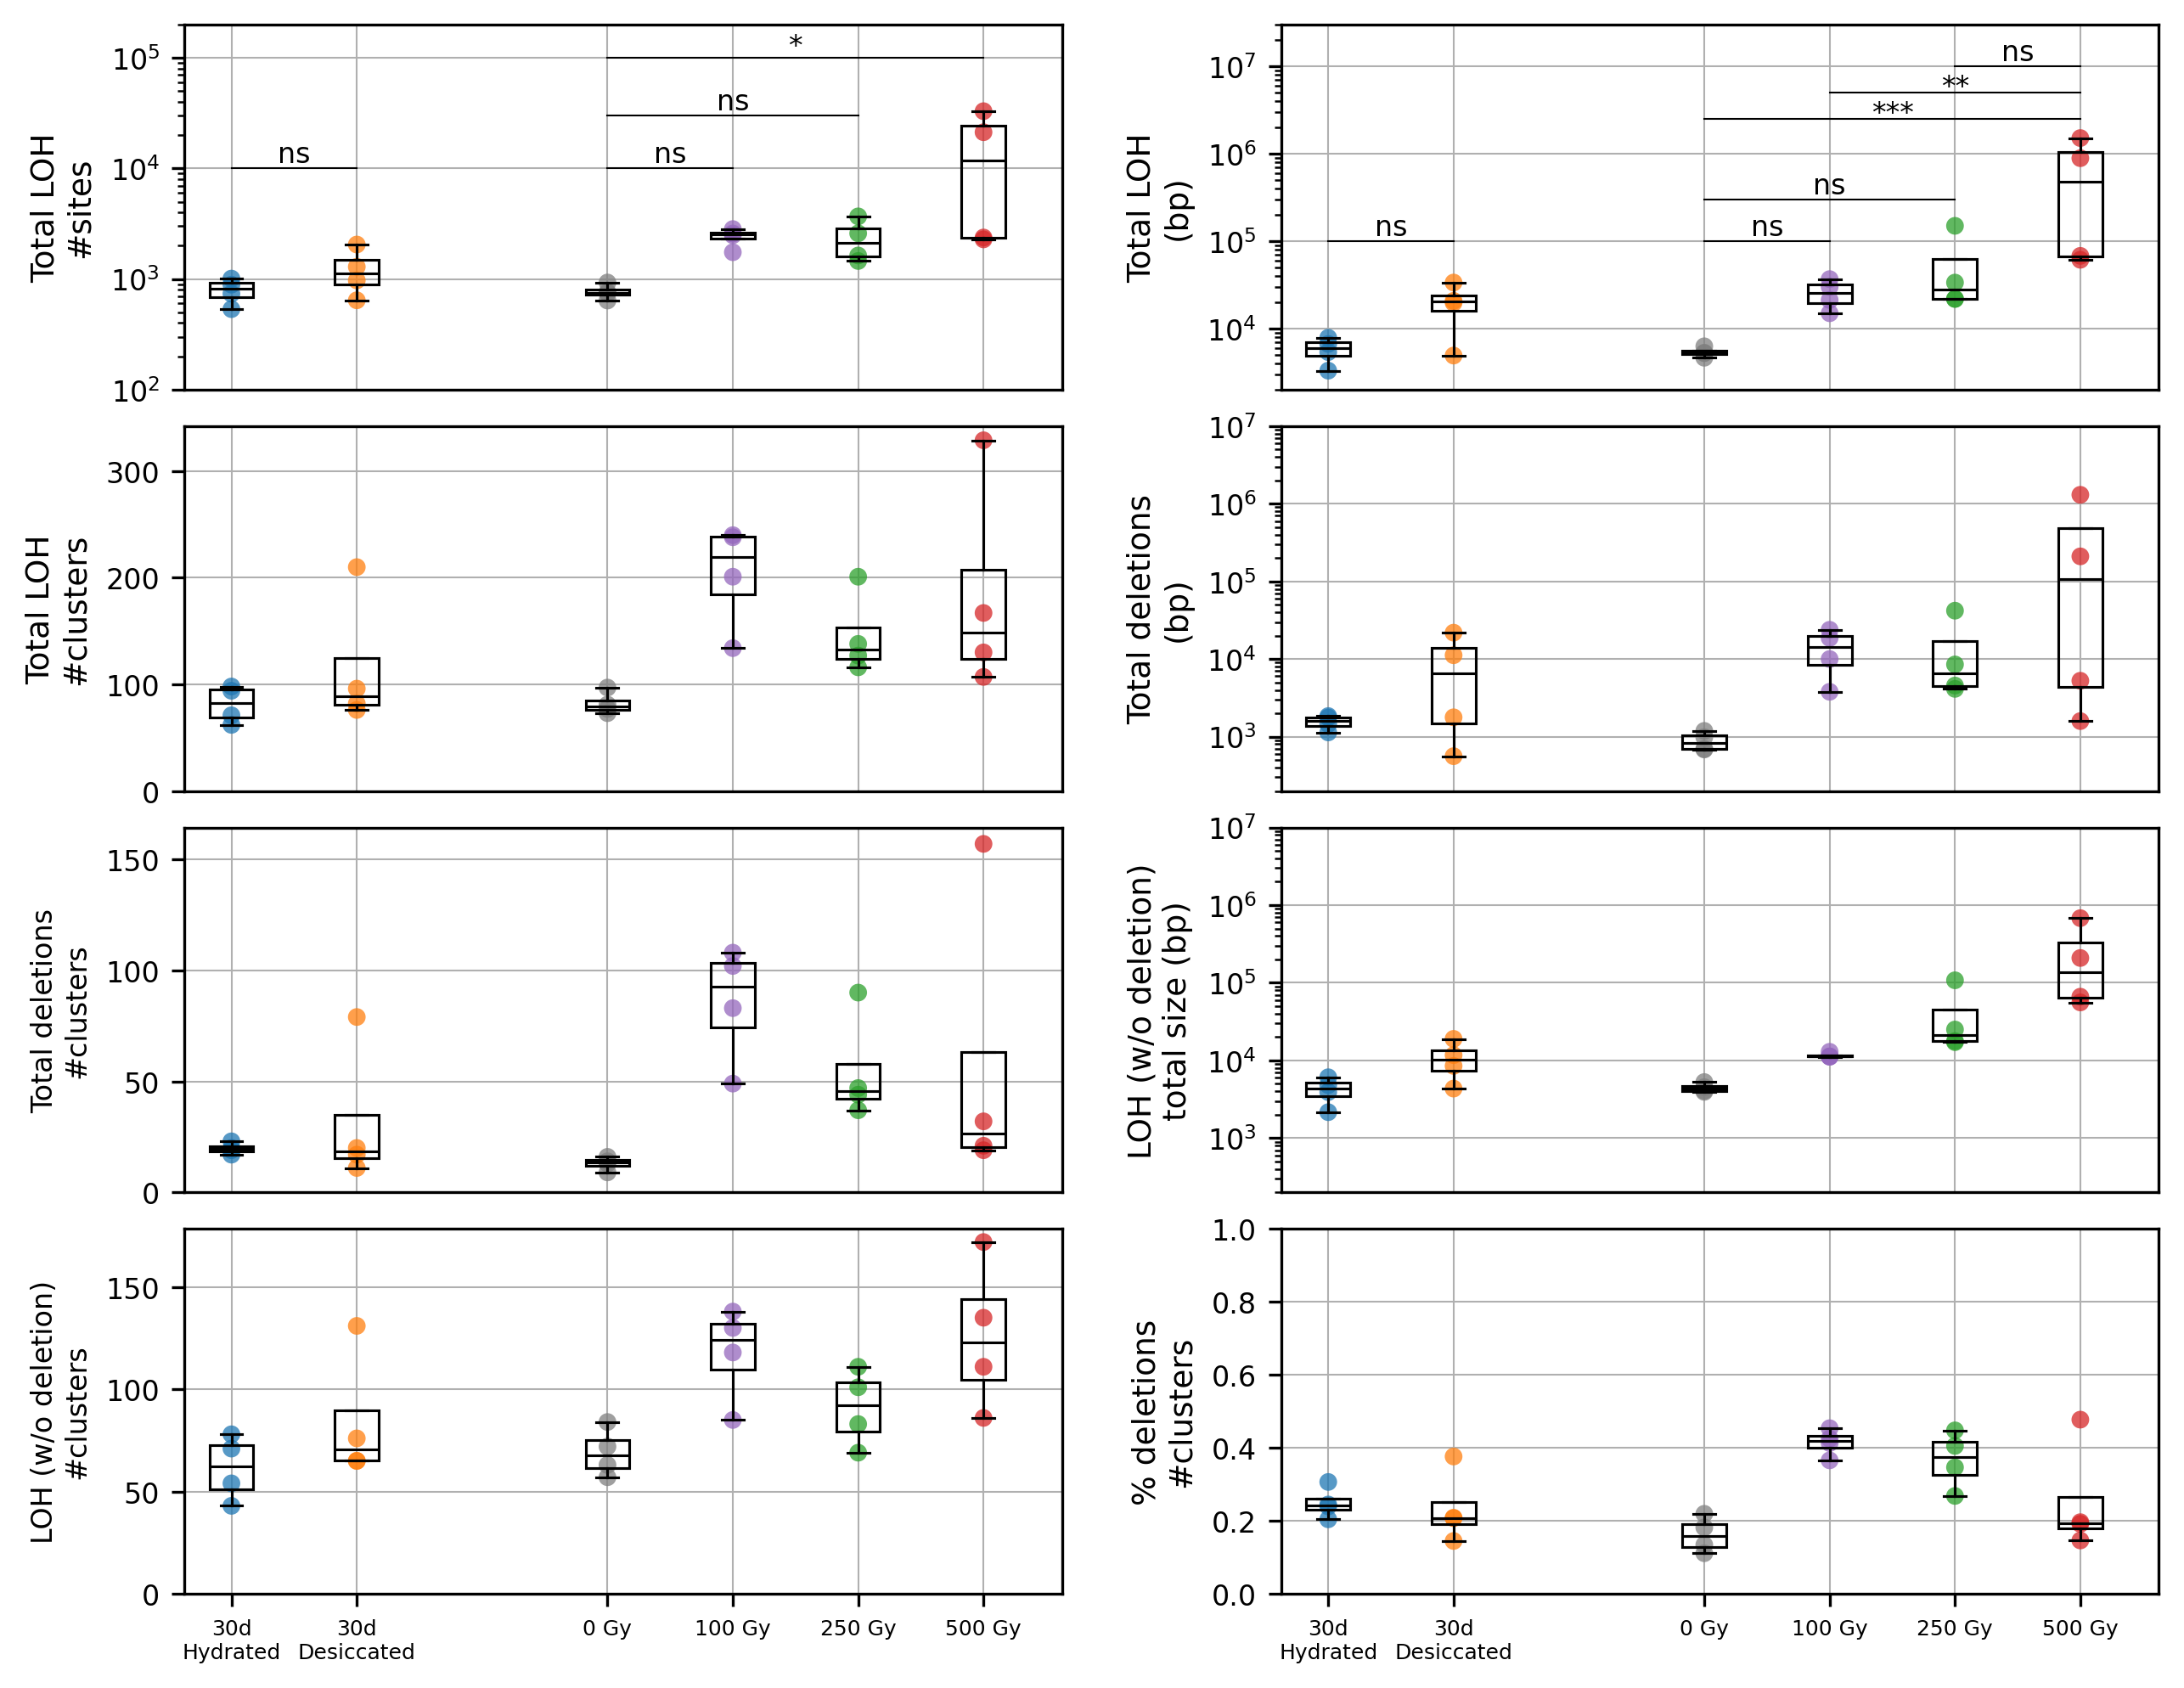

In [34]:
ccycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
alphas = ["FF", "DB", "B5", "91", "6E", "47", "24", "00"][::-1]

def convert_boxplot_to_stripplot_data(x_data, y_data, colors) :
    flattened_data = []
    for pos, y_group in zip(x_data, y_data):
        
        color_index = int(pos/2) if pos < 3 else int(pos/2) - 1
        color = colors[color_index]
        
        for y_val in y_group:
            flattened_data.append((pos, y_val, color))

        if len(y_group) == 0:
            flattened_data.append((pos, None, color))
            
    flattened_data += [(i, None) for i in range(0, max(x_data))]
    
    return pd.DataFrame(flattened_data, columns=["x", "y", "color"])
    
def format_boxplot(bp, fc=None) :
    [x.set_marker(".") for n, x in enumerate(bp["fliers"])]
    [x.set_markerfacecolor((0,0,0,0.25)) for n, x in enumerate(bp["fliers"])]
    [x.set_markeredgewidth(0) for n, x in enumerate(bp["fliers"])]
    if not fc:
        [x.set_facecolor(local_cycle[n]+alphas[-2]) for n, x in enumerate(bp["boxes"])]
    else :
        [x.set_facecolor(fc) for n, x in enumerate(bp["boxes"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["boxes"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["caps"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["whiskers"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["medians"])]
    [x.set_color("k") for n, x in enumerate(bp["medians"])]
    

condition = ["30d\nHydrated", "30d\nDesiccated", "0 Gy", "100 Gy", "250 Gy", "500 Gy"]
boxplot_positions = [0, 2, 6, 8, 10, 12]
local_cycle = [ccycle[0], ccycle[1], ccycle[7], ccycle[4], ccycle[2], ccycle[3]]
strip_colors = [local_cycle[n] for n in range(len(boxplot_positions))]
print(strip_colors)
fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(10,8))

ax = axs[0,0]
# Total LOH
stripplot_df = convert_boxplot_to_stripplot_data(boxplot_positions, boxplot_data["totalLOH"].values(), strip_colors)
ax = sns.stripplot(data=stripplot_df, x="x", y="y", ax=ax, zorder=3, alpha=0.75, linewidth=0, size=5, jitter=0, hue='color', palette=strip_colors, legend=False)
bp = ax.boxplot(x=boxplot_data["totalLOH"].values(), positions=boxplot_positions, widths=[0.7]*6, zorder=5, showfliers=False, patch_artist=True)

format_boxplot(bp, fc=(0,0,0,0))
ax.set_ylabel("Total LOH\n#sites", fontsize=9)
ax.set_yscale("log")
ax.set_ylim(1e2, 2e5)

ax = axs[0,1]
stripplot_df = convert_boxplot_to_stripplot_data(boxplot_positions, boxplot_data["totalLOHbp"].values(), strip_colors)
ax = sns.stripplot(data=stripplot_df, x="x", y="y", ax=ax, zorder=3, alpha=0.75, linewidth=0, size=5, jitter=0, hue='color', palette=strip_colors, legend=False)
bp = ax.boxplot(x=boxplot_data["totalLOHbp"].values(), positions=boxplot_positions, widths=[0.7]*6, zorder=5, showfliers=False, patch_artist=True)
format_boxplot(bp, fc=(0,0,0,0))
ax.set_ylabel("Total LOH\n(bp)", fontsize=9)
ax.set_yscale("log")
ax.set_ylim(2e3, 3e7)

ax = axs[1,0]
stripplot_df = convert_boxplot_to_stripplot_data(boxplot_positions, boxplot_data["numC"].values(), strip_colors)
ax = sns.stripplot(data=stripplot_df, x="x", y="y", ax=ax, zorder=3, alpha=0.75, linewidth=0, size=5, jitter=0, hue='color', palette=strip_colors, legend=False)
bp = ax.boxplot(x=boxplot_data["numC"].values(), positions=boxplot_positions, widths=[0.7]*6, zorder=5, showfliers=False, patch_artist=True)
format_boxplot(bp, fc=(0,0,0,0))
ax.set_ylabel("Total LOH\n#clusters", fontsize=9)
ax.set_ylim(0,)

ax = axs[1,1]
stripplot_df = convert_boxplot_to_stripplot_data(boxplot_positions, boxplot_data["DelBpSz"].values(), strip_colors)
ax = sns.stripplot(data=stripplot_df, x="x", y="y", ax=ax, zorder=3, alpha=0.75, linewidth=0, size=5, jitter=0, hue='color', palette=strip_colors, legend=False)
bp = ax.boxplot(x=boxplot_data["DelBpSz"].values(), positions=boxplot_positions, widths=[0.7]*6, zorder=5, showfliers=False, patch_artist=True)
format_boxplot(bp, fc=(0,0,0,0))
ax.set_ylabel("Total deletions\n(bp)", fontsize=9)
ax.set_yscale("log")
ax.set_ylim(2e2, 1e7)

ax = axs[2,0]
stripplot_df = convert_boxplot_to_stripplot_data(boxplot_positions, boxplot_data["numDel"].values(), strip_colors)
ax = sns.stripplot(data=stripplot_df, x="x", y="y", ax=ax, zorder=3, alpha=0.75, linewidth=0, size=5, jitter=0, hue='color', palette=strip_colors, legend=False)
bp = ax.boxplot(x=boxplot_data["numDel"].values(), positions=boxplot_positions, widths=[0.7]*6, zorder=5, showfliers=False, patch_artist=True)
format_boxplot(bp, fc=(0,0,0,0))
ax.set_ylabel("Total deletions\n#clusters", fontsize=8)
ax.set_ylim(0,)

ax = axs[2,1]
stripplot_df = convert_boxplot_to_stripplot_data(boxplot_positions, boxplot_data["LOHBpSz"].values(), strip_colors)
ax = sns.stripplot(data=stripplot_df, x="x", y="y", ax=ax, zorder=3, alpha=0.75, linewidth=0, size=5, jitter=0, hue='color', palette=strip_colors, legend=False)
bp = ax.boxplot(x=boxplot_data["LOHBpSz"].values(), positions=boxplot_positions, widths=[0.7]*6, zorder=5, showfliers=False, patch_artist=True)
format_boxplot(bp, fc=(0,0,0,0))
ax.set_ylabel("LOH (w/o deletion)\ntotal size (bp)", fontsize=9)
ax.set_yscale("log")
ax.set_ylim(2e2, 1e7)

ax = axs[3,0]
stripplot_df = convert_boxplot_to_stripplot_data(boxplot_positions, boxplot_data["numLOH"].values(), strip_colors)
ax = sns.stripplot(data=stripplot_df, x="x", y="y", ax=ax, zorder=3, alpha=0.75, linewidth=0, size=5, jitter=0, hue='color', palette=strip_colors, legend=False)
bp = ax.boxplot(x=boxplot_data["numLOH"].values(), positions=boxplot_positions, widths=[0.7]*6, zorder=5, showfliers=False, patch_artist=True)
format_boxplot(bp, fc=(0,0,0,0))
ax.set_ylabel("LOH (w/o deletion)\n#clusters", fontsize=8)
ax.set_ylim(0,)

ax = axs[3,1]
props = []
for cond, counts_del in boxplot_data["numDel"].items() :
    counts_normal = boxplot_data["numC"][cond]
    cond_props = [il/jn for il, jn in zip(counts_del, counts_normal)]
    props.append(cond_props)

    print(f"Deletion ratios for {cond}: ")
    print(cond_props)
    print(f"{np.mean(cond_props):.2%}")

stripplot_df = convert_boxplot_to_stripplot_data(boxplot_positions, props, strip_colors)
ax = sns.stripplot(data=stripplot_df, x="x", y="y", ax=ax, zorder=3, alpha=0.75, linewidth=0, size=5, jitter=0, hue='color', palette=strip_colors, legend=False)
bp = ax.boxplot(x=props, positions=boxplot_positions, widths=[0.7]*6, zorder=5, showfliers=False, patch_artist=True)
format_boxplot(bp, fc=(0,0,0,0))
ax.set_ylabel("% deletions\n#clusters", fontsize=9)
ax.set_ylim(0,1)

for axi in axs[:-1,:] :
    for ax in axi :
        ax.tick_params(axis="x", length=0)

ax = axs[-1,0]
ax.set_xticks(boxplot_positions)
ax.set_xticklabels(condition, fontsize=6)
ax.set_xlabel(None)

ax = axs[-1,1]
ax.set_xticks(boxplot_positions)
ax.set_xticklabels(condition, fontsize=6)
ax.set_xlabel(None)

for ax in axs.flatten() :
    ax.grid(axis="both", zorder=1, lw=0.5)
    ax.set_xlim(-0.75, 13.25)
    ax.tick_params(axis="y", labelsize=8)

fig.subplots_adjust(hspace=0.1, wspace=0.25)

### Significance
ax = axs[0,0]
ax.plot([6,12], [1e5, 1e5], color='k', lw=0.5)
ax.text(x=9, y=9.5e4, s='*', ha='center', va='bottom', fontsize=8)

x1 = 6
for m, x2, y in zip([7,8], [8,10], [1e4, 3e4]):
    ax.plot([x1,x2], [y, y], color='k', lw=0.5)
    ax.text(x=m, y=y, s='ns', ha='center', va='bottom', fontsize=8)

ax.plot([0,2], [1e4, 1e4], color='k', lw=0.5)
ax.text(x=1, y=1e4, s='ns', ha='center', va='bottom', fontsize=8)

### Significance
ax = axs[0,1]
ax.plot([6,12], [2.5e6, 2.5e6], color='k', lw=0.5)
ax.text(x=9, y=2e6, s='***', ha='center', va='bottom', fontsize=8)

ax.plot([8,12], [5e6, 5e6], color='k', lw=0.5)
ax.text(x=10, y=4e6, s='**', ha='center', va='bottom', fontsize=8)

ax.plot([10,12], [1e7, 1e7], color='k', lw=0.5)
ax.text(x=11, y=1e7, s='ns', ha='center', va='bottom', fontsize=8)

x1 = 6
for m, x2, y in zip([7,8], [8,10], [1e5, 3e5]):
    ax.plot([x1,x2], [y, y], color='k', lw=0.5)
    ax.text(x=m, y=y, s='ns', ha='center', va='bottom', fontsize=8)

ax.plot([0,2], [1e5, 1e5], color='k', lw=0.5)
ax.text(x=1, y=1e5, s='ns', ha='center', va='bottom', fontsize=8)

plt.show()

['#1f77b4', '#ff7f0e', '#7f7f7f', '#9467bd', '#2ca02c', '#d62728']


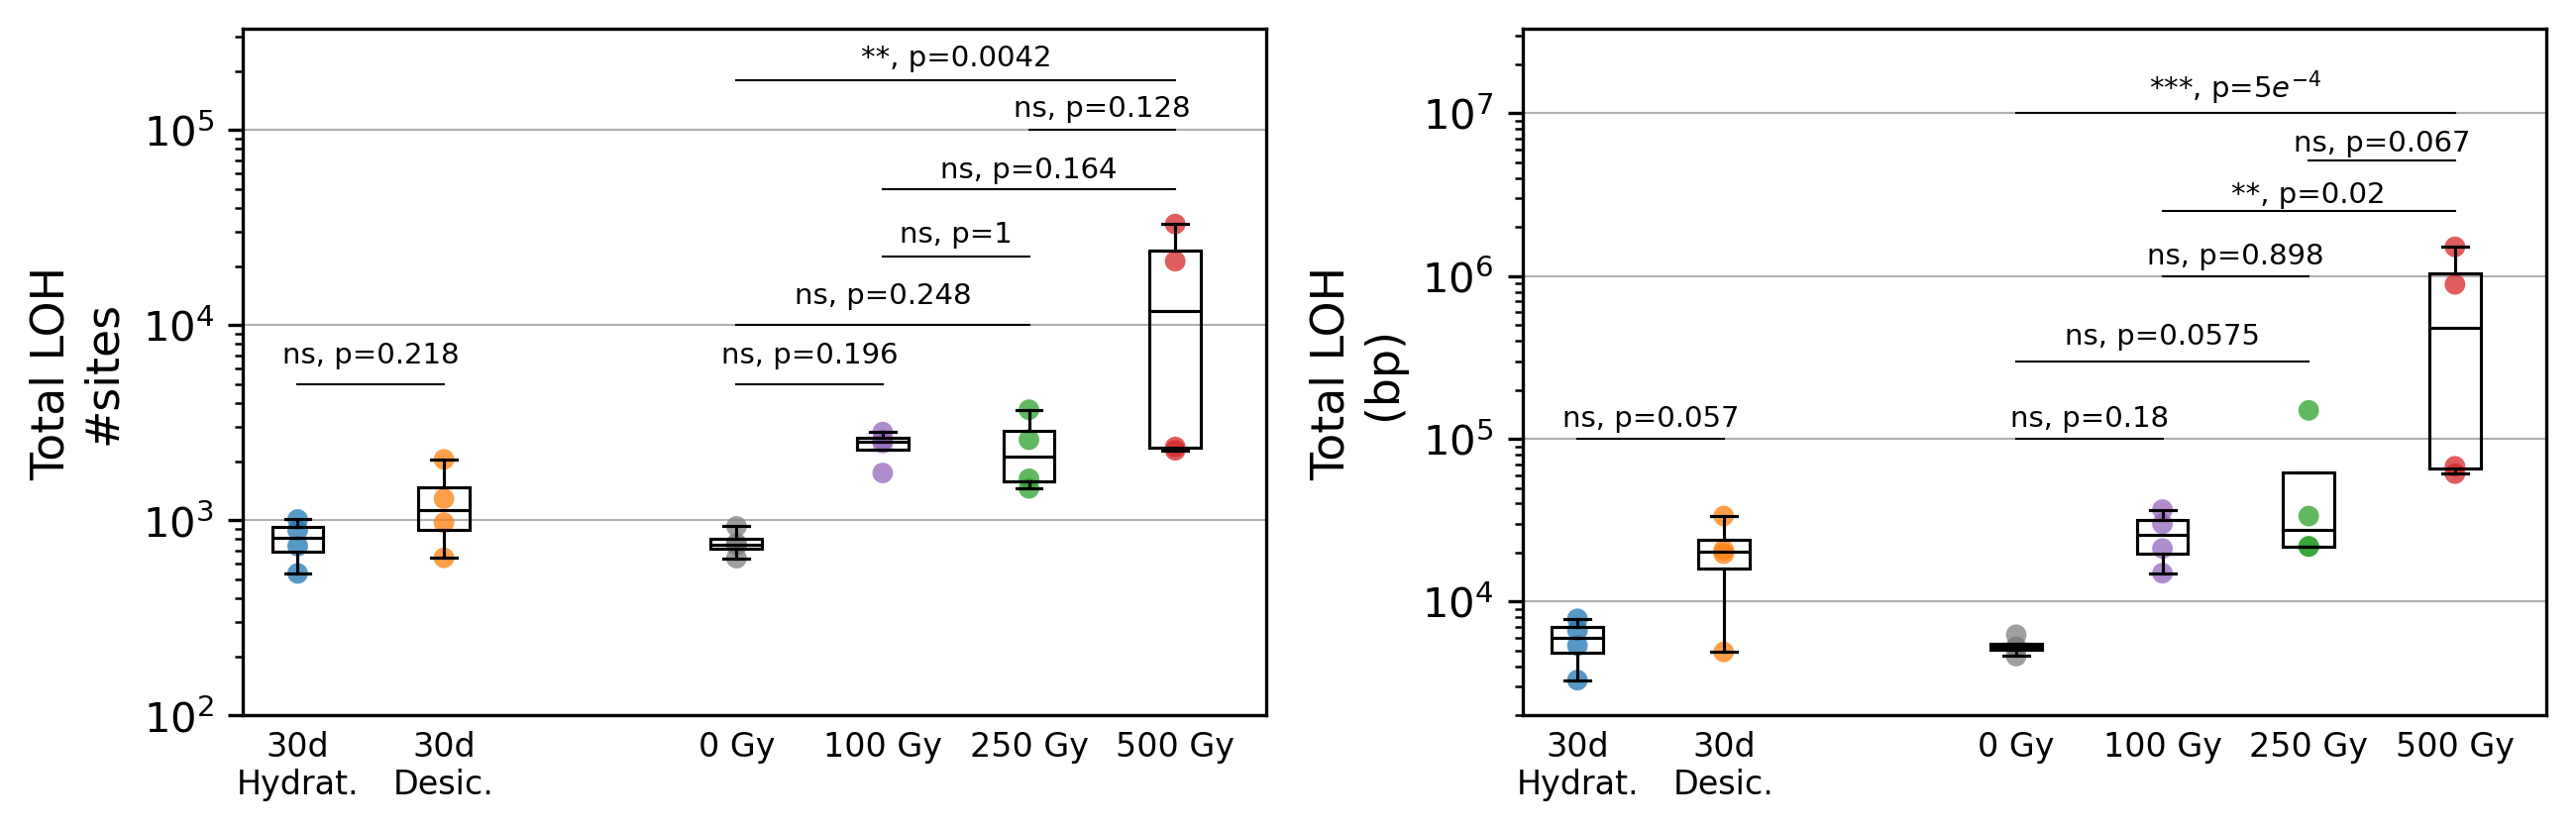

In [85]:
ccycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
alphas = ["FF", "DB", "B5", "91", "6E", "47", "24", "00"][::-1]

def convert_boxplot_to_stripplot_data(x_data, y_data, colors) :
    flattened_data = []
    for pos, y_group in zip(x_data, y_data):
        
        color_index = int(pos/2) if pos < 3 else int(pos/2) - 1
        color = colors[color_index]
        
        for y_val in y_group:
            flattened_data.append((pos, y_val, color))

        if len(y_group) == 0:
            flattened_data.append((pos, None, color))
            
    flattened_data += [(i, None) for i in range(0, max(x_data))]
    
    return pd.DataFrame(flattened_data, columns=["x", "y", "color"])
    
def format_boxplot(bp, fc=None) :
    [x.set_marker(".") for n, x in enumerate(bp["fliers"])]
    [x.set_markerfacecolor((0,0,0,0.25)) for n, x in enumerate(bp["fliers"])]
    [x.set_markeredgewidth(0) for n, x in enumerate(bp["fliers"])]
    if not fc:
        [x.set_facecolor(local_cycle[n]+alphas[-2]) for n, x in enumerate(bp["boxes"])]
    else :
        [x.set_facecolor(fc) for n, x in enumerate(bp["boxes"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["boxes"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["caps"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["whiskers"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["medians"])]
    [x.set_color("k") for n, x in enumerate(bp["medians"])]
    

condition = ["30d\nHydrat.", "30d\nDesic.", "0 Gy", "100 Gy", "250 Gy", "500 Gy"]
boxplot_positions = [0, 2, 6, 8, 10, 12]
local_cycle = [ccycle[0], ccycle[1], ccycle[7], ccycle[4], ccycle[2], ccycle[3]]
strip_colors = [local_cycle[n] for n in range(len(boxplot_positions))]
print(strip_colors)
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,3))

ax = axs[0]
# Total LOH
stripplot_df = convert_boxplot_to_stripplot_data(boxplot_positions, boxplot_data["totalLOH"].values(), strip_colors)
ax = sns.stripplot(data=stripplot_df, x="x", y="y", ax=ax, zorder=3, alpha=0.75, linewidth=0, size=5, jitter=0, hue='color', palette=strip_colors, legend=False)
bp = ax.boxplot(x=boxplot_data["totalLOH"].values(), positions=boxplot_positions, widths=[0.7]*6, zorder=5, showfliers=False, patch_artist=True)

format_boxplot(bp, fc=(0,0,0,0))
ax.set_ylabel("Total LOH\n#sites", fontsize=11)
ax.set_yscale("log")
ax.set_ylim(1e2, 3.3e5)

ax = axs[1]
stripplot_df = convert_boxplot_to_stripplot_data(boxplot_positions, boxplot_data["totalLOHbp"].values(), strip_colors)
ax = sns.stripplot(data=stripplot_df, x="x", y="y", ax=ax, zorder=3, alpha=0.75, linewidth=0, size=5, jitter=0, hue='color', palette=strip_colors, legend=False)
bp = ax.boxplot(x=boxplot_data["totalLOHbp"].values(), positions=boxplot_positions, widths=[0.7]*6, zorder=5, showfliers=False, patch_artist=True)
format_boxplot(bp, fc=(0,0,0,0))
ax.set_ylabel("Total LOH\n(bp)", fontsize=11)
ax.set_yscale("log")
ax.set_ylim(2e3, 3.3e7)

for ax in axs :
    ax.tick_params(axis="x", length=0)

ax = axs[0]
ax.set_xticks(boxplot_positions)
ax.set_xticklabels(condition, fontsize=8)
ax.set_xlabel(None)

ax = axs[1]
ax.set_xticks(boxplot_positions)
ax.set_xticklabels(condition, fontsize=8)
ax.set_xlabel(None)

for ax in axs :
    ax.grid(axis="y", zorder=1, lw=0.5)
    ax.set_xlim(-0.75, 13.25)
    ax.tick_params(axis="y", labelsize=10)

fig.subplots_adjust(hspace=0.1, wspace=0.25)

### Significance
ax = axs[0]
# 0Gy - 100Gy
ax.plot([6,8], [5e3, 5e3], color='k', lw=0.5)
ax.text(x=7, y=6e3, s='ns, p=0.196', ha='center', va='bottom', fontsize=7)

# 0Gy - 250Gy
ax.plot([6,10], [1e4, 1e4], color='k', lw=0.5)
ax.text(x=8, y=1.2e4, s='ns, p=0.248', ha='center', va='bottom', fontsize=7)

## 0Gy - 500Gy
ax.plot([6,12], [1.8e5, 1.8e5], color='k', lw=0.5)
ax.text(x=9, y=2e5, s='**, p=0.0042', ha='center', va='bottom', fontsize=7)

# 100Gy - 250Gy
ax.plot([8,10], [2.25e4, 2.25e4], color='k', lw=0.5)
ax.text(x=9, y=2.5e4, s='ns, p=1', ha='center', va='bottom', fontsize=7)

# 100Gy - 500Gy
ax.plot([8,12], [5e4, 5e4], color='k', lw=0.5)
ax.text(x=10, y=5.3e4, s='ns, p=0.164', ha='center', va='bottom', fontsize=7)

# 250Gy - 500Gy
ax.plot([10,12], [1e5, 1e5], color='k', lw=0.5)
ax.text(x=11, y=1.1e5, s='ns, p=0.128', ha='center', va='bottom', fontsize=7)

# 30H - 30 D
ax.plot([0,2], [5e3, 5e3], color='k', lw=0.5)
ax.text(x=1, y=6e3, s='ns, p=0.218', ha='center', va='bottom', fontsize=7)


### Significance
ax = axs[1]

# 0Gy - 100Gy
ax.plot([6,8], [1e5, 1e5], color='k', lw=0.5)
ax.text(x=7, y=1.1e5, s='ns, p=0.18', ha='center', va='bottom', fontsize=7)

# 0Gy - 250Gy
ax.plot([6,10], [3e5, 3e5], color='k', lw=0.5)
ax.text(x=8, y=3.5e5, s='ns, p=0.0575', ha='center', va='bottom', fontsize=7)

## 0Gy - 500Gy
ax.plot([6,12], [1e7,1e7], color='k', lw=0.5)
ax.text(x=9, y=1.1e7, s='***, p=5$e^{-4}$', ha='center', va='bottom', fontsize=7)

# 100Gy - 250Gy
ax.plot([8,10], [1e6, 1e6], color='k', lw=0.5)
ax.text(x=9, y=1.1e6, s='ns, p=0.898', ha='center', va='bottom', fontsize=7)

# 100Gy - 500Gy
ax.plot([8,12], [2.5e6, 2.5e6], color='k', lw=0.5)
ax.text(x=10, y=2.6e6, s='**, p=0.02', ha='center', va='bottom', fontsize=7)

# 250Gy - 500Gy
ax.plot([10,12], [5.1e6, 5.1e6], color='k', lw=0.5)
ax.text(x=11, y=5.4e6, s='ns, p=0.067', ha='center', va='bottom', fontsize=7)

# 30H - 30 D
ax.plot([0,2], [1e5, 1e5], color='k', lw=0.5)
ax.text(x=1, y=1.1e5, s='ns, p=0.057', ha='center', va='bottom', fontsize=7)

plt.show()

### Statistical tests IRRADIATION

In [2]:
stat_dataframe_IR = pd.DataFrame({
    "Replicate":[0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3],
    "DoseGy":[0,0,0,0,100,100,100,100,250,250,250,250,500,500,500,500],
    "TotalLOHsites":[762, 930, 639, 743, 1747, 2490, 2581, 2831, 2589, 1456, 1632, 3686, 21281, 32982, 2283, 2374],
    "TotalLOHbp":[5219, 6254, 5274, 4624, 14943, 29993, 36733, 21195, 33516, 21867, 21753, 149567, 889155, 1511173, 61129, 67773],
    "TotalClusters":[81, 97, 73, 77, 134, 201, 240, 238, 201, 116, 127, 138, 167, 329, 130, 107],
    "TotalLOHClusters":[72, 84, 57, 63, 85, 118, 138, 130, 111, 69, 83, 101, 135, 172, 111, 86],
    "TotalDELClusters":[9, 13, 16, 14, 49, 83, 102, 108, 90, 47, 44, 37,32, 157, 19, 21],
})
stat_dataframe_IR = stat_dataframe_IR.assign(propDEL=stat_dataframe_IR['TotalDELClusters']/stat_dataframe_IR['TotalClusters'])
stat_dataframe_IR["logLOHsites"] = np.log1p(stat_dataframe_IR["TotalLOHsites"])
stat_dataframe_IR["logLOHbp"] = np.log1p(stat_dataframe_IR["TotalLOHbp"])
stat_dataframe_IR["DoseGy_cat"] = stat_dataframe_IR["DoseGy"].astype("category")
stat_dataframe_IR

,Replicate,DoseGy,TotalLOHsites,TotalLOHbp,TotalClusters,TotalLOHClusters,TotalDELClusters,propDEL,logLOHsites,logLOHbp,DoseGy_cat
0,0,0,762,5219,81,72,9,0.111111,6.637258,8.560253,0
1,1,0,930,6254,97,84,13,0.134021,6.836259,8.741136,0
2,2,0,639,5274,73,57,16,0.219178,6.461468,8.570734,0
3,3,0,743,4624,77,63,14,0.181818,6.612041,8.439232,0
4,0,100,1747,14943,134,85,49,0.365672,7.466228,9.612065,100
5,1,100,2490,29993,201,118,83,0.412935,7.820440,10.308753,100
6,2,100,2581,36733,240,138,102,0.425000,7.856320,10.511458,100
7,3,100,2831,21195,238,130,108,0.453782,7.948738,9.961568,100
8,0,250,2589,33516,201,111,90,0.447761,7.859413,10.419808,250
9,1,250,1456,21867,116,69,47,0.405172,7.284135,9.992780,250


### Number of sites

In [3]:
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Treat Dose as continuous and log LOH
model = smf.ols("logLOHsites ~ DoseGy", data=stat_dataframe_IR).fit()
print(model.pvalues)
print(model.summary())

# Treat Dose as a factor (category) and log total LOH (sites)
model = smf.ols("logLOHsites ~ DoseGy_cat", data=stat_dataframe_IR).fit()
tukey = pairwise_tukeyhsd(stat_dataframe_IR["logLOHsites"], stat_dataframe_IR["DoseGy_cat"])
print(model.pvalues)
print(model.summary())
print(tukey)

Intercept    8.904318e-13
DoseGy       1.176000e-03
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            logLOHsites   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     16.46
Date:                Thu, 11 Sep 2025   Prob (F-statistic):            0.00118
Time:                        17:53:36   Log-Likelihood:                -17.282
No. Observations:                  16   AIC:                             38.56
Df Residuals:                      14   BIC:                             40.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

### Total LOH in basepairs

In [4]:
# Treat Dose as continuous and log LOH
model = smf.ols("logLOHbp ~ DoseGy", data=stat_dataframe_IR).fit()
print(model.pvalues)
print(model.summary())

# Treat Dose as a factor (category) and log total LOH (sites)
model = smf.ols("logLOHbp ~ DoseGy_cat", data=stat_dataframe_IR).fit()
tukey = pairwise_tukeyhsd(stat_dataframe_IR["logLOHbp"], stat_dataframe_IR["DoseGy_cat"])
print(model.pvalues)
print(model.summary())
print(tukey)

Intercept    6.514224e-13
DoseGy       5.174170e-05
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               logLOHbp   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     32.87
Date:                Thu, 11 Sep 2025   Prob (F-statistic):           5.17e-05
Time:                        17:53:39   Log-Likelihood:                -20.984
No. Observations:                  16   AIC:                             45.97
Df Residuals:                      14   BIC:                             47.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

### Statistical tests H vs D

In [88]:
print(boxplot_data["numC"])
print(boxplot_data["numLOH"])
print(boxplot_data["numDel"])
print(boxplot_data["totalLOH"]) # sites
print(boxplot_data["totalLOHbp"]) # sites

{'30H': [94, 98, 62, 71], '30D': [96, 210, 82, 76], '0Gy': [81, 97, 73, 77], '100Gy': [134, 201, 240, 238], '250Gy': [201, 116, 127, 138], '500Gy': [167, 329, 130, 107]}
{'30H': [71, 78, 43, 54], '30D': [76, 131, 65, 65], '0Gy': [72, 84, 57, 63], '100Gy': [85, 118, 138, 130], '250Gy': [111, 69, 83, 101], '500Gy': [135, 172, 111, 86]}
{'30H': [23, 20, 19, 17], '30D': [20, 79, 17, 11], '0Gy': [9, 13, 16, 14], '100Gy': [49, 83, 102, 108], '250Gy': [90, 47, 44, 37], '500Gy': [32, 157, 19, 21]}
{'30H': [889, 1009, 534, 737], '30D': [1290, 2051, 972, 642], '0Gy': [762, 930, 639, 743], '100Gy': [1747, 2490, 2581, 2831], '250Gy': [2589, 1456, 1632, 3686], '500Gy': [21281, 32982, 2283, 2374]}
{'30H': [6652, 7836, 3292, 5367], '30D': [19690, 33558, 20726, 4901], '0Gy': [5219, 6254, 5274, 4624], '100Gy': [14943, 29993, 36733, 21195], '250Gy': [33516, 21867, 21753, 149567], '500Gy': [889155, 1511173, 61129, 67773]}


In [92]:
stat_dataframe_HD = pd.DataFrame({
    "Replicate":[0,1,2,3,0,1,2,3],
    "Condition":['H', 'H', 'H', 'H', 'D', 'D', 'D', 'D'],
    "TotalLOHsites":[889, 1009, 534, 737, 1290, 2051, 972, 642],
    "TotalLOHbp":[6652, 7836, 3292, 5367, 19690, 33558, 20726, 4901],
    "TotalClusters":[94, 98, 62, 71, 96, 210, 82, 76],
    "TotalLOHClusters":[71, 78, 43, 54, 76, 131, 65, 65],
    "TotalDELClusters":[23, 20, 19, 17, 20, 79, 17, 11],
})
stat_dataframe_HD = stat_dataframe_HD.assign(propDEL=stat_dataframe_HD['TotalDELClusters']/stat_dataframe_HD['TotalClusters'])
stat_dataframe_HD["logLOHsites"] = np.log1p(stat_dataframe_HD["TotalLOHsites"])
stat_dataframe_HD["logLOHbp"] = np.log1p(stat_dataframe_HD["TotalLOHbp"])
stat_dataframe_HD["ConditionCat"] = stat_dataframe_HD["Condition"].astype("category")
stat_dataframe_HD

,Replicate,Condition,TotalLOHsites,TotalLOHbp,TotalClusters,TotalLOHClusters,TotalDELClusters,propDEL,logLOHsites,logLOHbp,ConditionCat
0,0,H,889,6652,94,71,23,0.244681,6.791221,8.802823,H
1,1,H,1009,7836,98,78,20,0.204082,6.917706,8.966611,H
2,2,H,534,3292,62,43,19,0.306452,6.282267,8.099554,H
3,3,H,737,5367,71,54,17,0.239437,6.603944,8.588211,H
4,0,D,1290,19690,96,76,20,0.208333,7.163172,9.887917,D
5,1,D,2051,33558,210,131,79,0.376190,7.626570,10.421060,D
6,2,D,972,20726,82,65,17,0.207317,6.880384,9.939192,D
7,3,D,642,4901,76,65,11,0.144737,6.466145,8.497399,D


In [104]:
print(stat_dataframe_HD.to_csv(index=False))

Replicate,Condition,TotalLOHsites,TotalLOHbp,TotalClusters,TotalLOHClusters,TotalDELClusters,propDEL,logLOHsites,logLOHbp,ConditionCat,logit_propDEL
0,H,889,6652,94,71,23,0.24468085106382978,6.7912214627261855,8.802823159741887,H,-1.1271856611121658
1,H,1009,7836,98,78,20,0.20408163265306123,6.917705609835305,8.966611387052865,H,-1.3609765531356006
2,H,534,3292,62,43,19,0.3064516129032258,6.282266746896006,8.099554282376364,H,-0.8167611365271221
3,H,737,5367,71,54,17,0.23943661971830985,6.6039438246004725,8.588210678651517,H,-1.1557707025080584
0,D,1290,19690,96,76,20,0.20833333333333334,7.1631723908466425,9.88791695754517,D,-1.33500106673234
1,D,2051,33558,210,131,79,0.3761904761904762,7.62657020629066,10.421060362759361,D,-0.50574947073413
2,D,972,20726,82,65,17,0.2073170731707317,6.880384082186005,9.939192477156904,D,-1.341173925839421
3,D,642,4901,76,65,11,0.14473684210526316,6.466144724237619,8.497398564088058,D,-1.7764919970972666



In [97]:
model_bp = smf.ols("logLOHbp ~ ConditionCat", data=stat_dataframe_HD).fit()
print(model_bp.summary())

model_sites = smf.ols("logLOHsites ~ ConditionCat", data=stat_dataframe_HD).fit()
print(model_sites.summary())

stat_dataframe_HD["logit_propDEL"] = np.log(stat_dataframe_HD["propDEL"] / (1 - stat_dataframe_HD["propDEL"]))

model_propDEL = smf.ols("logit_propDEL ~ ConditionCat", data=stat_dataframe_HD).fit()
print(model_propDEL.summary())

                            OLS Regression Results                            
Dep. Variable:               logLOHbp   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     5.554
Date:                Tue, 06 May 2025   Prob (F-statistic):             0.0565
Time:                        21:04:39   Log-Likelihood:                -6.6720
No. Observations:                   8   AIC:                             17.34
Df Residuals:                       6   BIC:                             17.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.6864      0.32

/home/urbe/anaconda3/envs/stats2/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/urbe/anaconda3/envs/stats2/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/urbe/anaconda3/envs/stats2/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [101]:
model_bp.params['ConditionCat[T.H]']

-1.072092213431715

In [103]:
fc = np.exp(model_bp.params['ConditionCat[T.H]'])  # fold change in LOHbp
print(f"Fold-change is: {fc}")

Fold-change is: 0.34229162060345303


In [ ]:
model_1 = smf.mixedlm("log_LOH ~ treatment + coverage", 
                    data=data_lmm, 
                    groups=data_lmm["clone"])
result_1 = model_1.fit()
print(result_1.summary())

# Supp. Fig. Average BP size vs. Number of clusters

In [ ]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
alphas = ["FF", "DB", "B5", "91", "6E", "47", "24", "00"][::-1]

def format_boxplot(bp) :
    [x.set_marker(".") for n, x in enumerate(bp["fliers"])]
    [x.set_markerfacecolor((0,0,0,0.25)) for n, x in enumerate(bp["fliers"])]
    [x.set_markeredgewidth(0) for n, x in enumerate(bp["fliers"])]
    [x.set_facecolor(cycle[n]+alphas[-2]) for n, x in enumerate(bp["boxes"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["boxes"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["caps"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["whiskers"])]
    [x.set_linewidth(0.75) for n, x in enumerate(bp["medians"])]
    [x.set_color("k") for n, x in enumerate(bp["medians"])]
    

condition = ["30d\nHydrated", "30d\nDesiccated", "0 Gy", "100 Gy", "250 Gy", "500 Gy"]
positions = [0, 2, 4, 5.5, 7, 8.5]

fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(10,10))

ax = axs[0,0]
bp = ax.boxplot(x=boxplot_data["numC"].values(), positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("# LOH clusters")

ax = axs[0,1]
bp = ax.boxplot(x=boxplot_data["avBpSz"].values(), positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("Average\ncluster size")
ax.set_yscale("log")
ax.set_ylim(4, 1e4)

ax = axs[1,0]
bp = ax.boxplot(x=boxplot_data["NumLar"].values(), positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("# large\nclusters (> 100)")

ax = axs[1,1]
bp = ax.boxplot(x=boxplot_data["avLarBpS"].values(), positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("Average cluster\nsize (> 100)")
ax.set_yscale("log")
ax.set_ylim(4, 1e4)

ax = axs[2,0]
bp = ax.boxplot(x=boxplot_data["numDel"].values(), positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("# Deletions")

ax = axs[2,1]
bp = ax.boxplot(x=boxplot_data["avDelS"].values(), positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("Average deletion\n size")
ax.set_yscale("log")
ax.set_ylim(4, 1e4)

ax = axs[3,0]
props = []
for cond, counts_large in boxplot_data["NumLar"].items() :
    counts_normal = boxplot_data["numC"][cond]
    cond_props = [il/jn for il, jn in zip(counts_large, counts_normal)]
    props.append(cond_props)
bp = ax.boxplot(x=props, positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("Proportion of large clusters")

ax = axs[3,1]
props = []
for cond, counts_del in boxplot_data["numDel"].items() :
    counts_normal = boxplot_data["numC"][cond]
    cond_props = [il/jn for il, jn in zip(counts_del, counts_normal)]
    props.append(cond_props)
bp = ax.boxplot(x=props, positions=positions, widths=[0.7]*6, zorder=5, showfliers=True, patch_artist=True)
format_boxplot(bp)
ax.set_ylabel("Proportion of deletions")

for axi in axs[:-1,:] :
    for ax in axi :
        ax.tick_params(axis="x", length=0)

ax = axs[-1,0]
ax.set_xticks(positions)
ax.set_xticklabels(condition, fontsize=8)
ax = axs[-1,1]
ax.set_xticks(positions)
ax.set_xticklabels(condition, fontsize=8)

for ax in axs.flatten() :
    ax.grid(axis="y", zorder=1)
    ax.set_xlim(-0.75, 9.25)

fig.subplots_adjust(hspace=0.0, wspace=0.25)

plt.show()

# Figure 1cd

In [115]:
mpl.rcParams['figure.dpi'] = 300

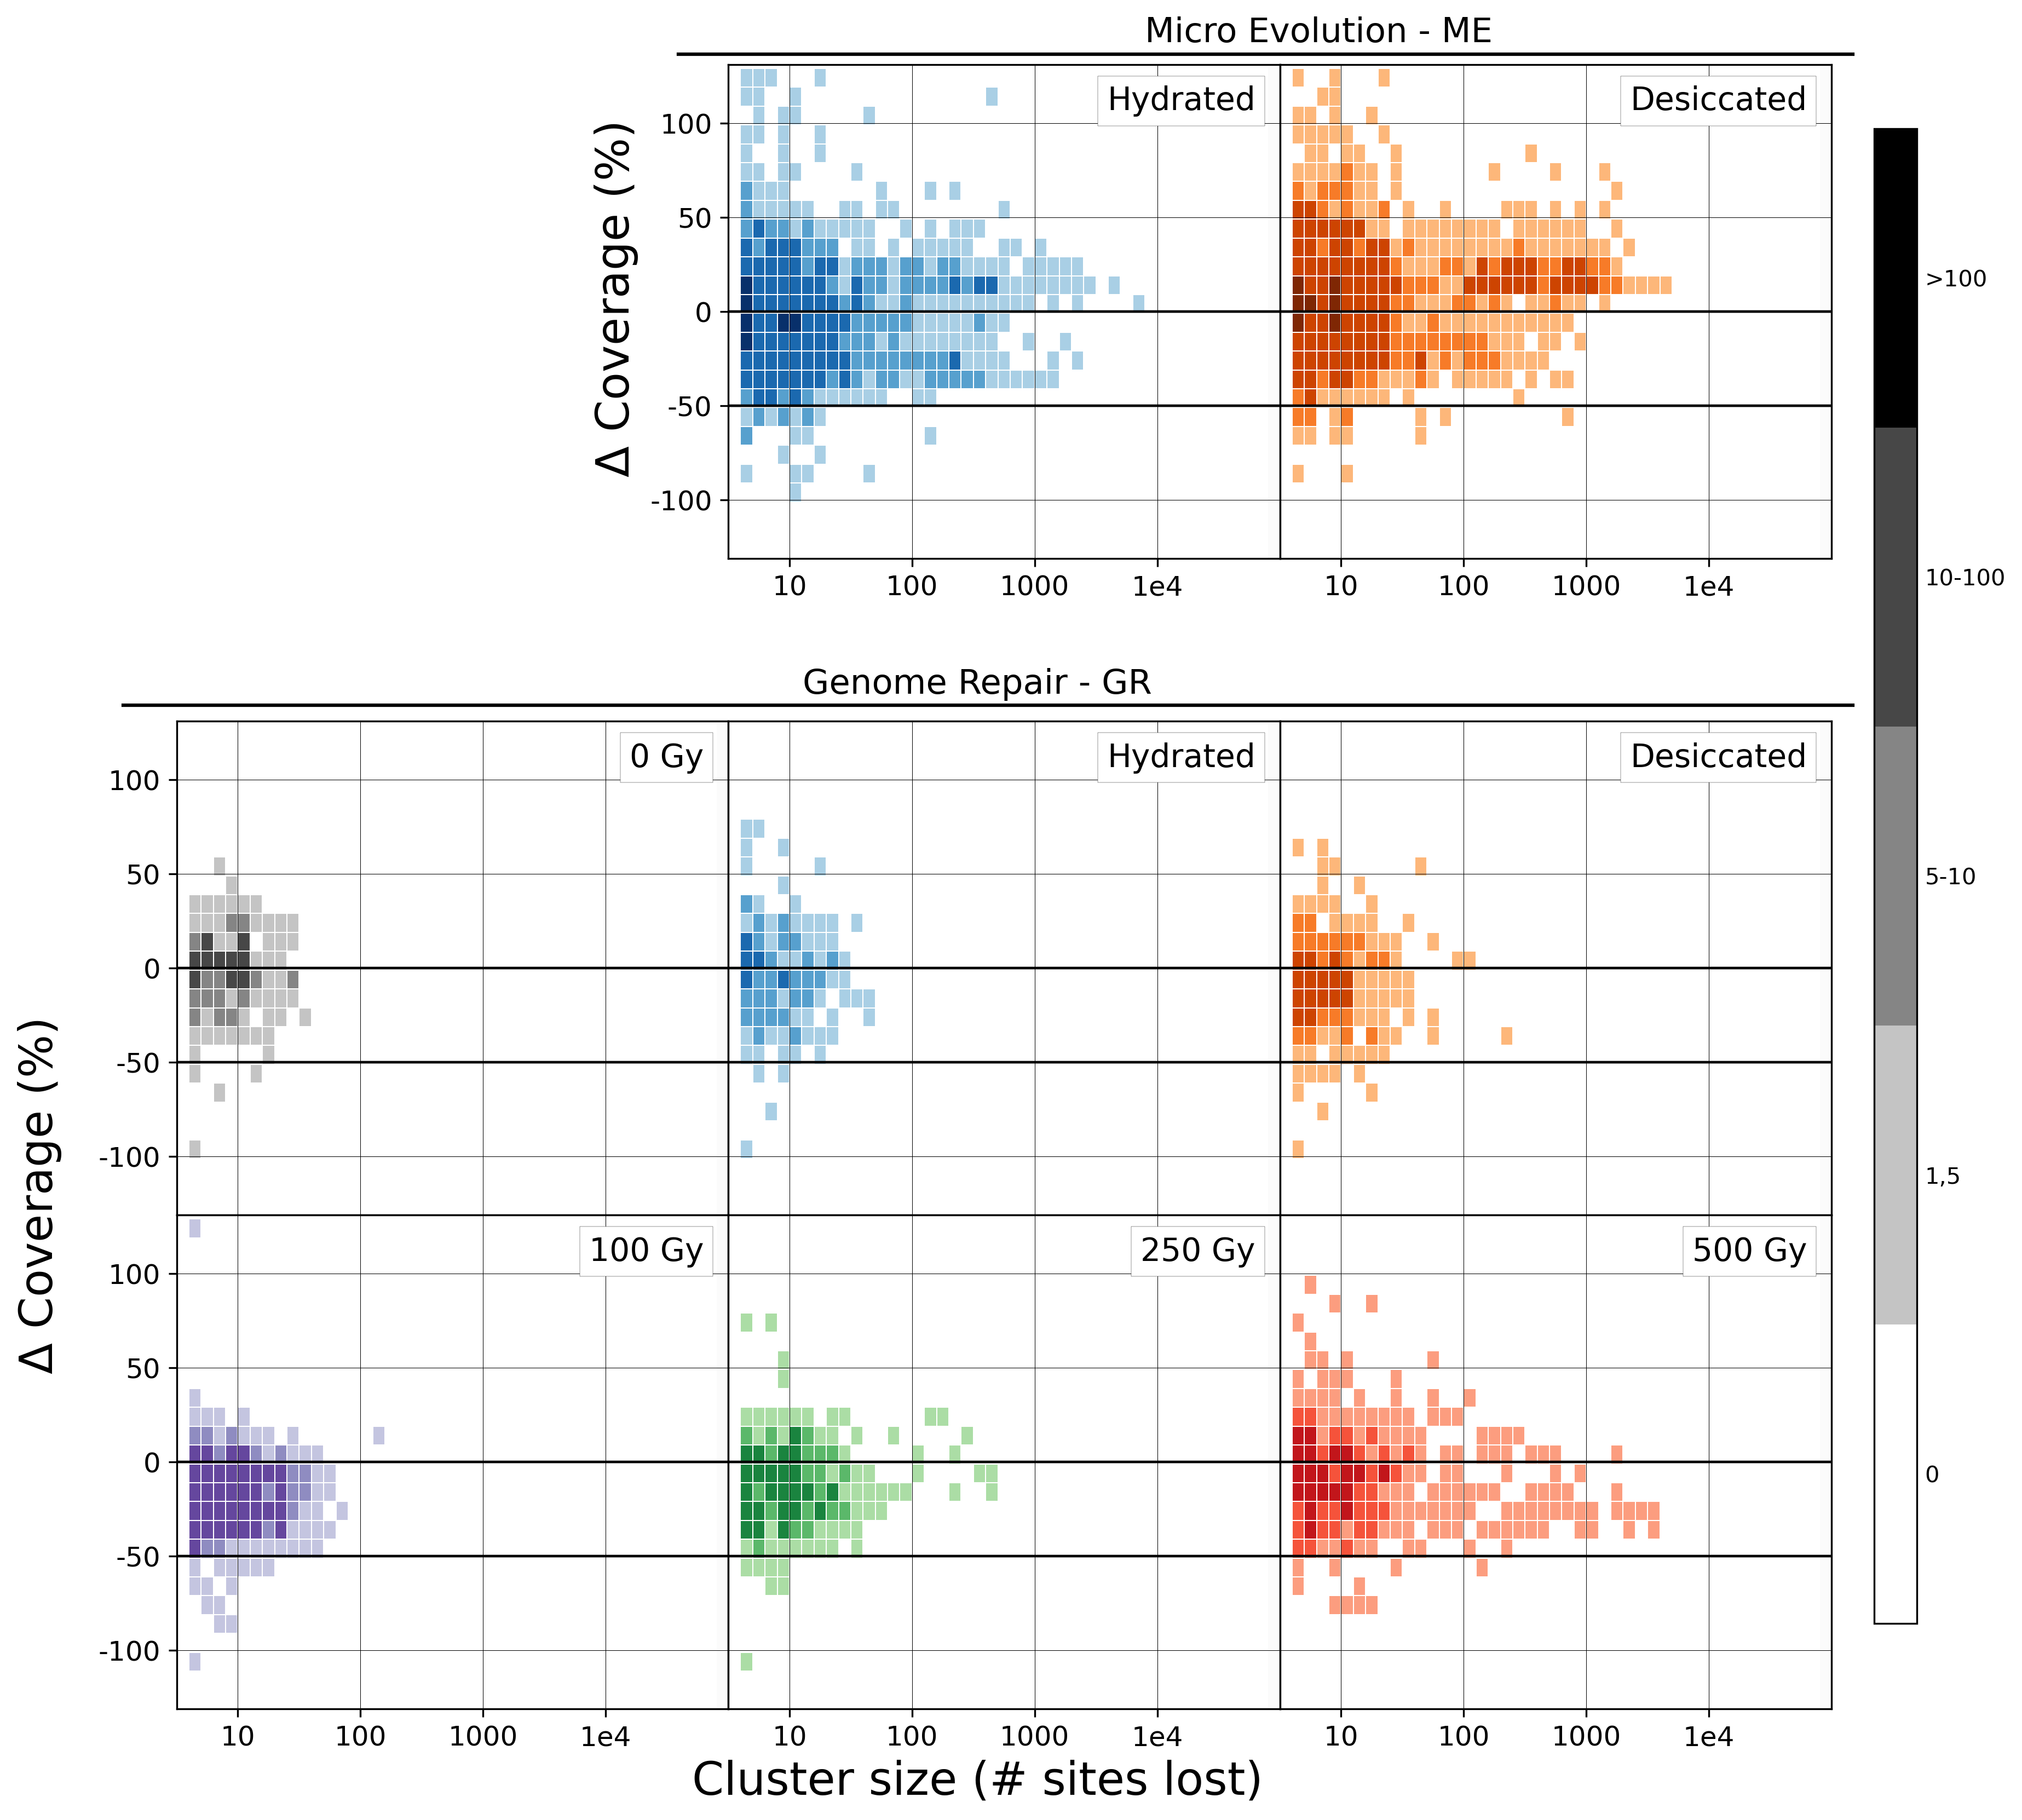

In [134]:
"""Helper dicts"""
condition_grid = {
    "30H":(0,1),
    "30D":(0,2),
    "0Gy":(0,0),
    "100Gy":(1,0),
    "250Gy":(1,1),
    "500Gy":(1,2),
    "H":0,
    "D":1,
}

condition_title_2dhist = {
    "30H":"Hydrated",
    "30D":"Desiccated",
    "0Gy":"0 Gy",
    "100Gy":"100 Gy",
    "250Gy":"250 Gy",
    "500Gy":"500 Gy",
    "H":"Hydrated",
    "D":"Desiccated",
}

min_size = 5
"""Prepare data"""
data = {}
for sm, df in all_clusters_merged.items() :
    cond = sample_cond[sm]
    cdf = df.query("GET_size >= @min_size")
    if cond not in data.keys() :
        data[cond] = cdf
    else :
        data[cond] = pd.concat([data[cond], cdf])
        data[cond] = data[cond].reset_index(drop=True)

"""Prepare figure"""
fig = plt.figure(figsize=(13,13))#, layout="constrained")

gs0 = fig.add_gridspec(2, 1, height_ratios=(1,2), hspace=0.22)
gs1 = gs0[0].subgridspec(1, 3, hspace=0.0, wspace=0.0)

ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
ma_axs = [ax2, ax3]

gs2 = gs0[1].subgridspec(2, 3, hspace=0.0, wspace=0.0)
gr_axs = [[fig.add_subplot(gs2[r,c]) for c in range(3)] for r in range(2)]

"""Titles and labels"""
fig.text(
    s='Micro Evolution - ME',
    ha="center", va="center",
    x=0.66, y=0.895, fontsize=15,
)

fig.text(
    s='Genome Repair - GR',
    ha="center", va="center",
    x=0.5, y=0.59, fontsize=15,
)

fig.text(0.5, 0.07, 'Cluster size (# sites lost)', ha='center', fontsize=20)
fig.text(0.05, 0.35, r"$\Delta$ Coverage (%)", va='center', rotation='vertical', fontsize=20)
fig.text(0.32, 0.77, r"$\Delta$ Coverage (%)", va='center', rotation='vertical', fontsize=20)

for condition, cdf in data.items() :
    
    if condition in ["H", "D"] :
        ax = ma_axs[condition_grid[condition]]
    else :
        pp = condition_grid[condition]
        ax = gr_axs[pp[0]][pp[1]]
        
    cmap = conditions_cmap[condition]  # define the colormap
    cmaplist = [cmap(i) for i in range(32, cmap.N)] # extract all colors from the .jet map
    cmaplist[0] = (1.0, 1.0, 1.0, 1.0) # force the first color entry to be white
    mycmap = mpl.colors.LinearSegmentedColormap.from_list('My cmap', cmaplist, cmap.N)
    bounds = [0, 1, 5, 10, 50, 100]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    counts, xedges, yedges, im = ax.hist2d(
        np.log10(cdf["GET_size"]), cdf["DIFF"],
        range=((0.5,5),(-131,131)),
        bins=(np.arange(0.5,5.0,0.1),np.arange(-131,131,10)),
        norm=norm, cmap=mycmap,
        ec="w", lw=0.1,
    )
    
    ax.text(
        x=4.8, y=120, s=condition_title_2dhist[condition], fontsize=14,
        ha="right", va="top",
        bbox={"facecolor":"white", "linewidth":0.1},
    )
    
    if condition in ["H", "0Gy", "100Gy"] :
        ax.set_yticks([-100, -50, 0, 50, 100])
        ax.set_yticklabels([-100, -50, 0, 50, 100], fontsize=12)
    else :
        ax.tick_params(axis="y", length=0)
        ax.set_yticklabels([])
        ax.set_yticks([])
        
    if condition in ["H", "D", "100Gy", "250Gy", "500Gy"] :
        ax.set_xticks([1,2,3,4])
        ax.set_xticklabels(["10","100","1000","1e4"], fontsize=12)
    else :
        ax.tick_params(axis="x", length=0)
        ax.set_xticklabels([])
        ax.set_xticks([])
    
    for xpos in [1,2,3,4,5] :
        for val in [-100,50,100] :
            ax.plot([0,5],[val,val], color="k", lw=0.2, zorder=1)
        for val in [-50,0] :
            ax.plot([0,5],[val,val], color="k", lw=1.0, zorder=1)

        ax.vlines([1,2,3,4], ymin=-160, ymax=160, color="k", lw=0.2, zorder=1)
    
    if condition == "0Gy" :
        cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
        cbar = fig.colorbar(im, cax=cbar_ax, spacing='uniform', ticks=[0.5,3,7.5,30,75], boundaries=bounds, format='%1i')
        cbar_ax.set_yticklabels(['0', '1,5', '5-10', '10-100', '>100'])
        cbar.ax.tick_params(length=0, which="both")
        
    ax.set_ylim(-131,131)
    ax.set_xlim(0.5,5)
    ax.set_facecolor((0.985,0.985,0.985))


ln = Line2D([0.36,0.91], [0.885,0.885], color="k")
ln2 = Line2D([0.1,0.91], [0.580,0.580], color="k")

fig.add_artist(ln)
fig.add_artist(ln2)

plt.show()

### Distribution over all chromosomes "stacked"

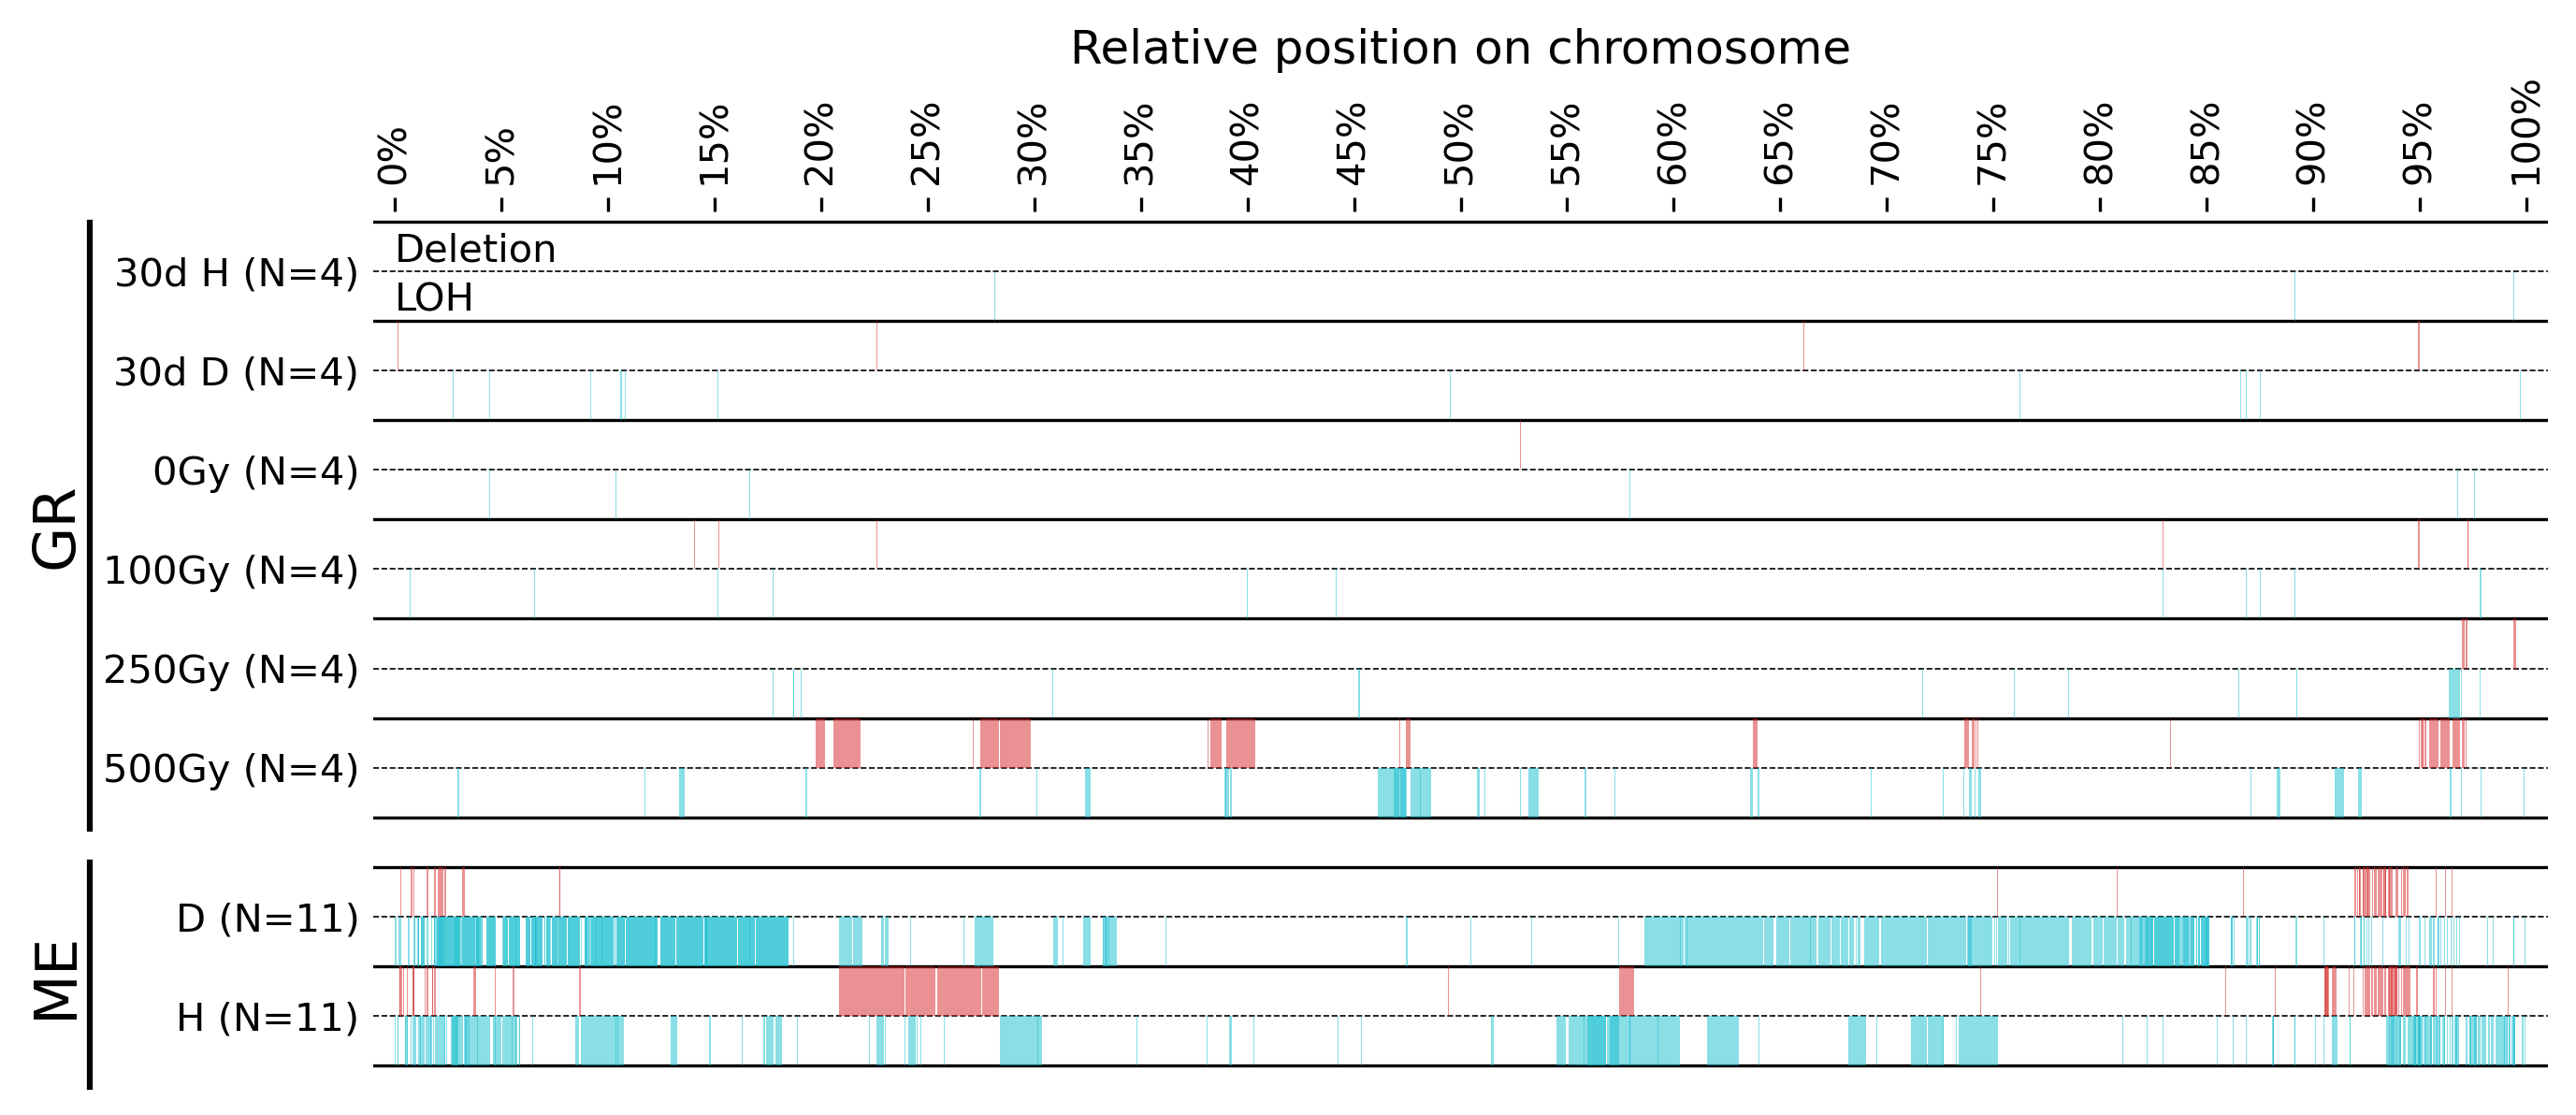

In [14]:
cond_y0 = {
    "H":-4.5,
    "D":-3.5,
    "500Gy":-2,
    "250Gy":-1,
    "100Gy":0,
    "0Gy":1,
    "30D":2,
    "30H":3,
}

conditions_colors = {
    "30H": (0.0,0.0,1.0,0.8), # blue
    "30D": (1.0,0.5,0.0,0.8), # orangered
    "0Gy": (0.5,0.5,0.5,0.8), # dark grey
    "100Gy": (0.7,0.0,0.6,0.8), # purple
    "250Gy": (0.0,0.75,0.0,0.8), # darkgreen
    "500Gy": (1.0,0.0,0.0,0.6), # red
    "H": (0.0,0.0,1.0,0.6),
    "D": (1.0,0.25,0.0,0.6),
}

ccycle = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])
event_colors = {
    "DEL":ccycle[3]+"80", # Heterozygous deletion
    "DUP":ccycle[2], # Duplication
    "LOH":ccycle[9]+"80", # LOH
    "RES":ccycle[8], # Restoration (cov = 1 previously 0.5)
    "HDE":ccycle[5], # Homozygous deletion
    "ancestor":ccycle[0],
    "midpoint":ccycle[2],
    "endpoint":ccycle[1], # and "offspring" for ARC
    "nanopore":ccycle[3],
}


fig, ax = plt.subplots(sharex=False, figsize=(10,4))

patches = []

ax.set_ylim(-4.6,4.1)
ax.set_yticks([])
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title("Relative position on chromosome", fontsize=12, pad=-5.0)
ax.xaxis.tick_top()

ax.set_xlim(-0.01, 1.01)
xticksval = [i for i in np.arange(0.0, 1.01, 0.05)]
ax.set_xticks(xticksval)
ax.set_xticklabels([str(int(i*100))+"%" for i in xticksval], rotation="vertical")

#for i in [-4.5,-3.5,-2.5,-2,-1,0,1,2,3,4,5] :
#    ax.plot([-0.01, 1.01], [i,i], lw=0.4, color="k")

ax.set_yticks([-4.0,-3.0,-1.5,-0.5,0.5,1.5,2.5,3.5], minor=False)
ax.set_yticks([-4.5,-3.5,-2.5,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0], minor=True)
ax.set_yticklabels(["H (N=11)","D (N=11)","500Gy (N=4)","250Gy (N=4)","100Gy (N=4)","0Gy (N=4)","30d D (N=4)","30d H (N=4)"])
ax.tick_params(axis="y", length=0, which="both")

ax.grid(axis="y", which="major", lw=0.4, linestyle="dashed", color="k", zorder=15)
ax.grid(axis="y", which="minor", lw=0.8, color="k", zorder=15)

for sample, cdf in all_dfs.items() :
    
    # Relative coverage
    acdf = cdf.assign(OPER=cdf.apply(lambda x: (x["ODP_mean"]/median_coverage[sample])*100, axis="columns"))
    acdf = acdf.assign(APER=acdf.apply(lambda x: (x["ADP_mean"]/median_coverage["ancestor"])*100, axis="columns"))
    acdf = acdf.assign(DIFF=acdf.apply(lambda x: x["OPER"]-x["APER"], axis="columns"))
    
    # Relative positions on chromosomes
    acdf = acdf.assign(RELSTART=acdf.apply(lambda x: x["POS_first"]/lengths[x["CHROM_first"]], axis="columns"))
    acdf = acdf.assign(RELEND=acdf.apply(lambda x: x["POS_last"]/lengths[x["CHROM_first"]], axis="columns"))
    
    y0 = cond_y0[sample_cond[sample]]
    width = 0.5
    
    HR = acdf.query("DIFF >= -25")
    dele = acdf.query("DIFF < -25")
    
    # HR
    patches = []
    for n, row in HR.iterrows() :
        rect = Rectangle((row["RELSTART"], y0), row["RELEND"]-row["RELSTART"], width,)
        patches.append(rect)

    collection = PatchCollection(patches, facecolor = event_colors["LOH"], zorder=10)
    ax.add_collection(collection)

    # Deletions
    patches = []
    for n, row in dele.iterrows() :
        #print(row["RELEND"])
        rect = Rectangle((row["RELSTART"], y0+width), row["RELEND"]-row["RELSTART"], width,)
        patches.append(rect)

    collection = PatchCollection(patches, facecolor = event_colors["DEL"], zorder=10)
    ax.add_collection(collection)
    
    #ax.plot([0.0,1.0], [y0+width, y0+width], lw=1.0, linestyle="dashed", color="k")

ax.spines["top"].set_linewidth(0)
ax.spines["left"].set_linewidth(0)

fig.text(0.002, 0.6, 'GR', va='center', rotation='vertical', fontsize=15)
fig.text(0.002, 0.2, 'ME', va='center', rotation='vertical', fontsize=15)

ln1 = Line2D([0.024,0.024], [0.33,0.87], color="k")
ln2 = Line2D([0.024,0.024], [0.1,0.3], color="k")
fig.add_artist(ln1)
fig.add_artist(ln2)

ax.set_xlim(-0.01, 1.01)

ax.text(s="Deletion", x=0, y=3.51, ha="left", va="bottom")
ax.text(s="LOH", x=0, y=3.01, ha="left", va="bottom")

plt.show()

### With TE density

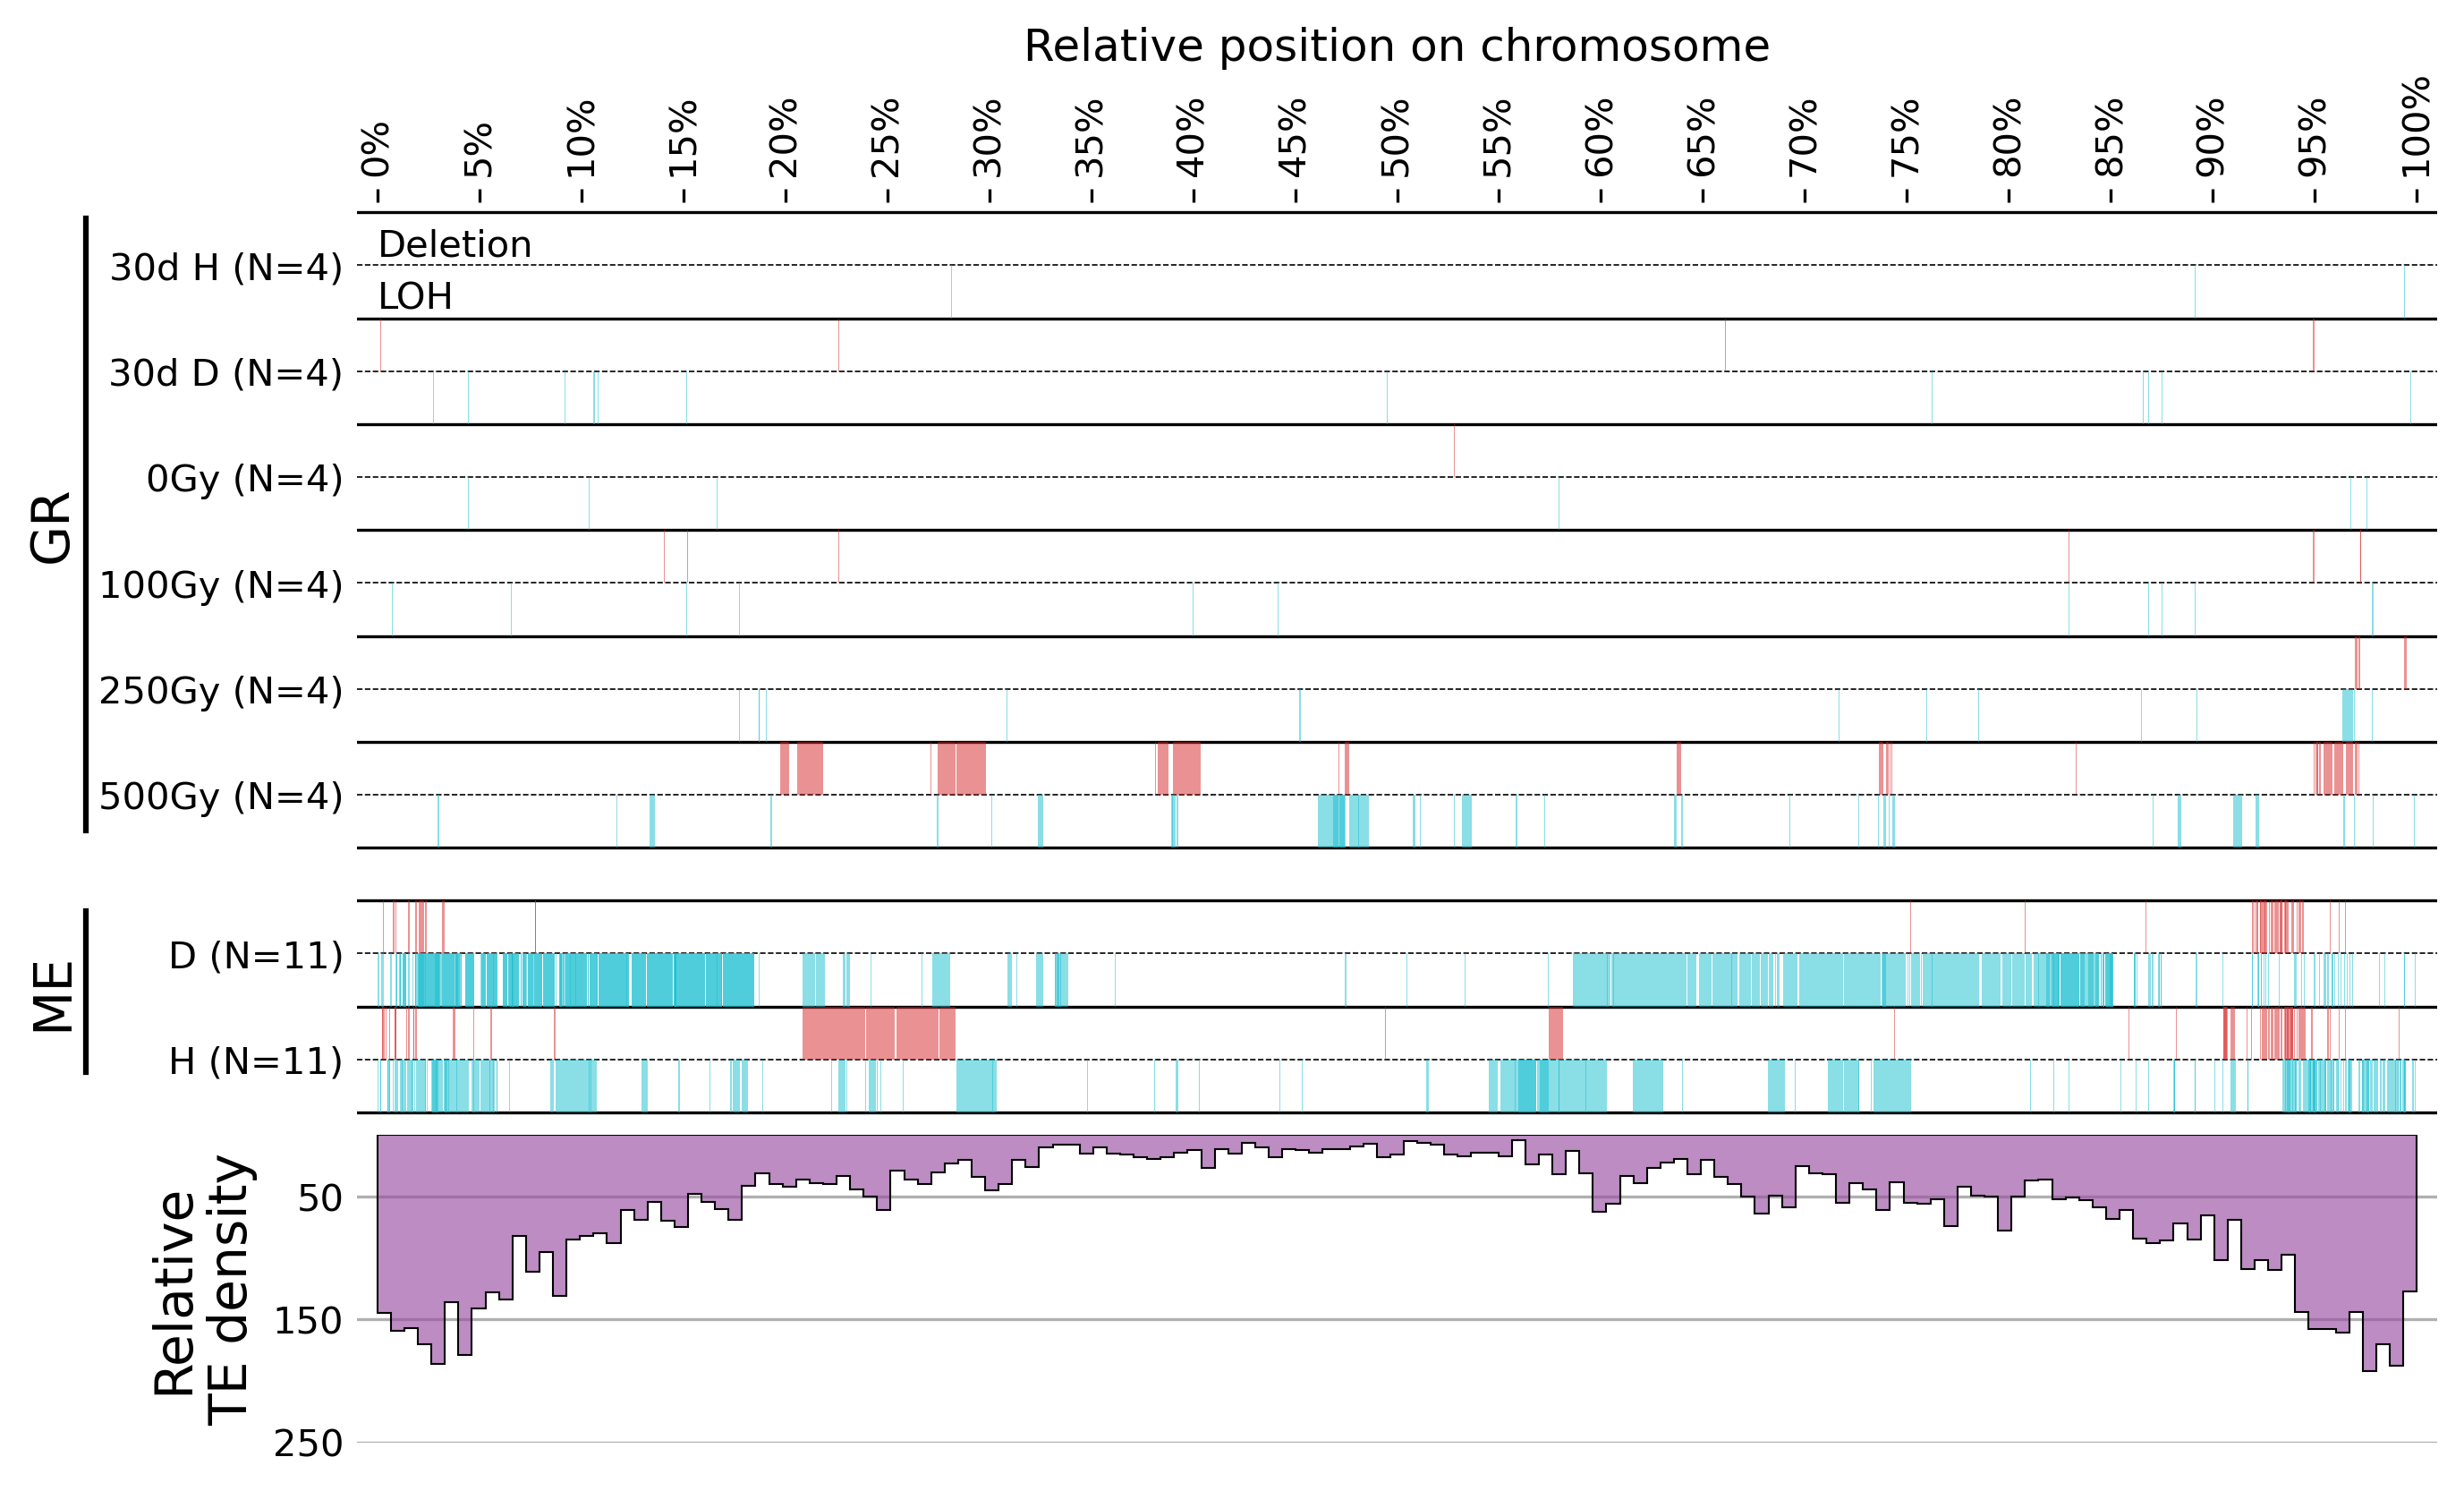

In [15]:
cond_y0 = {
    "H":-4.5,
    "D":-3.5,
    "500Gy":-2,
    "250Gy":-1,
    "100Gy":0,
    "0Gy":1,
    "30D":2,
    "30H":3,
}

conditions_colors = {
    "30H": (0.0,0.0,1.0,0.8), # blue
    "30D": (1.0,0.5,0.0,0.8), # orangered
    "0Gy": (0.5,0.5,0.5,0.8), # dark grey
    "100Gy": (0.7,0.0,0.6,0.8), # purple
    "250Gy": (0.0,0.75,0.0,0.8), # darkgreen
    "500Gy": (1.0,0.0,0.0,0.6), # red
    "H": (0.0,0.0,1.0,0.6),
    "D": (1.0,0.25,0.0,0.6),
}

ccycle = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])
event_colors = {
    "DEL":ccycle[3]+"80", # Heterozygous deletion
    "DUP":ccycle[2], # Duplication
    "LOH":ccycle[9]+"80", # LOH
    "RES":ccycle[8], # Restoration (cov = 1 previously 0.5)
    "HDE":ccycle[5], # Homozygous deletion
    "ancestor":ccycle[0],
    "midpoint":ccycle[2],
    "endpoint":ccycle[1], # and "offspring" for ARC
    "nanopore":ccycle[3],
}


fig, axs = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=(10,6), gridspec_kw={"height_ratios":[6,2]})


ax = axs[0]
patches = []

ax.set_ylim(-4.6,4.1)
ax.set_yticks([])
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title("Relative position on chromosome", fontsize=12, pad=-5.0)
ax.xaxis.tick_top()

ax.set_xlim(-0.01, 1.01)
xticksval = [i for i in np.arange(0.0, 1.01, 0.05)]
ax.set_xticks(xticksval)
ax.set_xticklabels([str(int(i*100))+"%" for i in xticksval], rotation="vertical")

#for i in [-4.5,-3.5,-2.5,-2,-1,0,1,2,3,4,5] :
#    ax.plot([-0.01, 1.01], [i,i], lw=0.4, color="k")

ax.set_yticks([-4.0,-3.0,-1.5,-0.5,0.5,1.5,2.5,3.5], minor=False)
ax.set_yticks([-4.5,-3.5,-2.5,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0], minor=True)
ax.set_yticklabels(["H (N=11)","D (N=11)","500Gy (N=4)","250Gy (N=4)","100Gy (N=4)","0Gy (N=4)","30d D (N=4)","30d H (N=4)"])
ax.tick_params(axis="y", length=0, which="both")

ax.grid(axis="y", which="major", lw=0.4, linestyle="dashed", color="k", zorder=15)
ax.grid(axis="y", which="minor", lw=0.8, color="k", zorder=15)

for sample, cdf in all_dfs.items() :
    
    # Relative coverage
    acdf = cdf.assign(OPER=cdf.apply(lambda x: (x["ODP_mean"]/median_coverage[sample])*100, axis="columns"))
    acdf = acdf.assign(APER=acdf.apply(lambda x: (x["ADP_mean"]/median_coverage["ancestor"])*100, axis="columns"))
    acdf = acdf.assign(DIFF=acdf.apply(lambda x: x["OPER"]-x["APER"], axis="columns"))
    
    # Relative positions on chromosomes
    acdf = acdf.assign(RELSTART=acdf.apply(lambda x: x["POS_first"]/lengths[x["CHROM_first"]], axis="columns"))
    acdf = acdf.assign(RELEND=acdf.apply(lambda x: x["POS_last"]/lengths[x["CHROM_first"]], axis="columns"))
    
    y0 = cond_y0[sample_cond[sample]]
    width = 0.5
    
    HR = acdf.query("DIFF >= -25")
    dele = acdf.query("DIFF < -25")
    
    # HR
    patches = []
    for n, row in HR.iterrows() :
        rect = Rectangle((row["RELSTART"], y0), row["RELEND"]-row["RELSTART"], width,)
        patches.append(rect)

    collection = PatchCollection(patches, facecolor = event_colors["LOH"], zorder=10)
    ax.add_collection(collection)

    # Deletions
    patches = []
    for n, row in dele.iterrows() :
        #print(row["RELEND"])
        rect = Rectangle((row["RELSTART"], y0+width), row["RELEND"]-row["RELSTART"], width,)
        patches.append(rect)

    collection = PatchCollection(patches, facecolor = event_colors["DEL"], zorder=10)
    ax.add_collection(collection)
    
    #ax.plot([0.0,1.0], [y0+width, y0+width], lw=1.0, linestyle="dashed", color="k")

ax.spines["top"].set_linewidth(0)
ax.spines["left"].set_linewidth(0)

fig.text(0.002, 0.68, 'GR', va='center', rotation='vertical', fontsize=14)
fig.text(0.002, 0.39, 'ME', va='center', rotation='vertical', fontsize=14)

ln1 = Line2D([0.024,0.024], [0.49,0.87], color="k")
ln2 = Line2D([0.024,0.024], [0.34,0.44], color="k")
fig.add_artist(ln1)
fig.add_artist(ln2)

ax.set_xlim(-0.01, 1.01)

ax.text(s="Deletion", x=0, y=3.515, ha="left", va="bottom", fontsize=10)
ax.text(s="LOH", x=0, y=3.015, ha="left", va="bottom", fontsize=10)



ax = axs[1]
TEreps = repdf.assign(RELSTART=repdf.apply(lambda x: x["START"]/lengths[x["CHR"]], axis="columns"))

ax.hist(TEreps["RELSTART"], bins=151, ec="k", histtype="stepfilled", color=col_TE, lw=0.5, zorder=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xlim(-0.01, 1.01)
ax.set_xticks([])
ax.set_ylim(0,250)
ax.set_yticks([50,150,250])
ax.set_ylabel("Relative\nTE density", fontsize=14)

ax.tick_params(axis='y', which='major', length=0)

ax.yaxis.grid(True, zorder=1)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_xticklines(), visible=False)

plt.gca().invert_yaxis()

ax.spines["left"].set_linewidth(0)

fig.subplots_adjust(hspace=0.02)


plt.show()

#### Testing distribution of events

In [167]:
ME_data = []
GR_data = []

for sample, cdf in all_dfs.items() :

    condition = sample_cond[sample]
    if condition not in ['H', 'D', '500Gy']:
        continue
    
    
    # Relative coverage
    acdf = cdf.assign(OPER=cdf.apply(lambda x: (x["ODP_mean"]/median_coverage[sample])*100, axis="columns"))
    acdf = acdf.assign(APER=acdf.apply(lambda x: (x["ADP_mean"]/median_coverage["ancestor"])*100, axis="columns"))
    acdf = acdf.assign(DIFF=acdf.apply(lambda x: x["OPER"]-x["APER"], axis="columns"))
    
    # Relative positions on chromosomes
    acdf = acdf.assign(RELSTART=acdf.apply(lambda x: x["POS_first"]/lengths[x["CHROM_first"]], axis="columns"))
    acdf = acdf.assign(RELEND=acdf.apply(lambda x: x["POS_last"]/lengths[x["CHROM_first"]], axis="columns"))

    if sample_cond[sample] in ['H', 'D']:
        ME_data.append(acdf)
    else:
        GR_data.append(acdf)

GR_acdf = pd.concat(GR_data).query("GET_size >= 100")
ME_acdf = pd.concat(ME_data).query("GET_size >= 100")
print(f"N(GR 500Gy) = {len(GR_acdf)}")
print(f"N(ME) = {len(ME_acdf)}")

N(GR 500Gy) = 87
N(ME) = 865


865 87


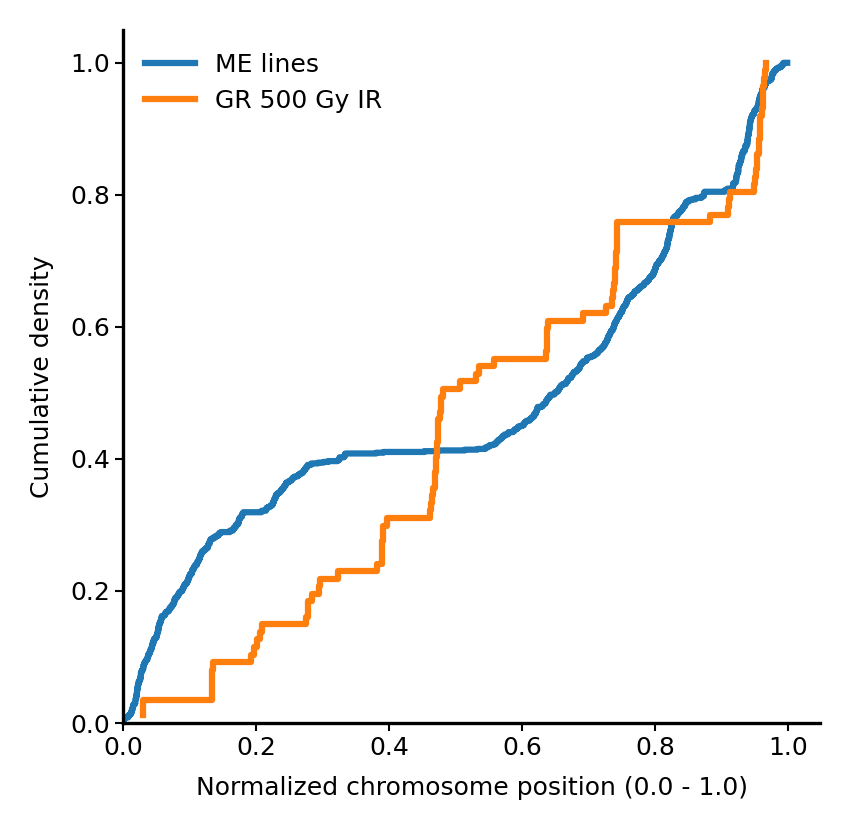

{'KS Statistic': 0.2544681416517175, 'KS p-value': 5.3257239772634576e-05}

In [172]:
from scipy.stats import ks_2samp
from scipy.stats import chi2_contingency

# Perform the test for both conditions
df1 = ME_acdf[['RELSTART', 'RELEND']]
df2 = GR_acdf[['RELSTART', 'RELEND']]
print(len(df1), len(df2))

# ECDF Comparison and KS Test
ecdf1 = np.sort(df1['RELSTART'])
ecdf2 = np.sort(df2['RELSTART'])
ks_stat, ks_pvalue = ks_2samp(ecdf1, ecdf2)

# Plotting the ECDF comparison
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
ax.step(ecdf1, np.arange(1, len(ecdf1) + 1) / len(ecdf1), label="ME lines")
ax.step(ecdf2, np.arange(1, len(ecdf2) + 1) / len(ecdf2), label="GR 500 Gy IR")
ax.set_xlabel("Normalized chromosome position (0.0 - 1.0)", fontsize=6)
ax.set_ylabel("Cumulative density", fontsize=6)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(fontsize=6, frameon=False)
ax.tick_params(labelsize=6, width=0.5, length=2, pad=1)
ax.set_ylim(0,)
ax.set_xlim(0,)
plt.show()

# Display results
results = {
    "KS Statistic": ks_stat,
    "KS p-value": ks_pvalue
}

results

Chi2 = 268.532, p = 3.360e-47
[[130  76  47  30  52  14   4   1   2   7  32  50  47  78  95  30  96  74]
 [  2   0   5   5   1   6   1   6  17   3   1   5   1  12   0   1   3  18]]
[[119.93697479  69.05462185  47.24789916  31.80147059  48.15651261
   18.17226891   4.54306723   6.36029412  17.26365546   9.08613445
   29.9842437   49.9737395   43.61344538  81.77521008  86.31827731
   28.16701681  89.95273109  83.59243697]
 [ 12.06302521   6.94537815   4.75210084   3.19852941   4.84348739
    1.82773109   0.45693277   0.63970588   1.73634454   0.91386555
    3.0157563    5.0262605    4.38655462   8.22478992   8.68172269
    2.83298319   9.04726891   8.40756303]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


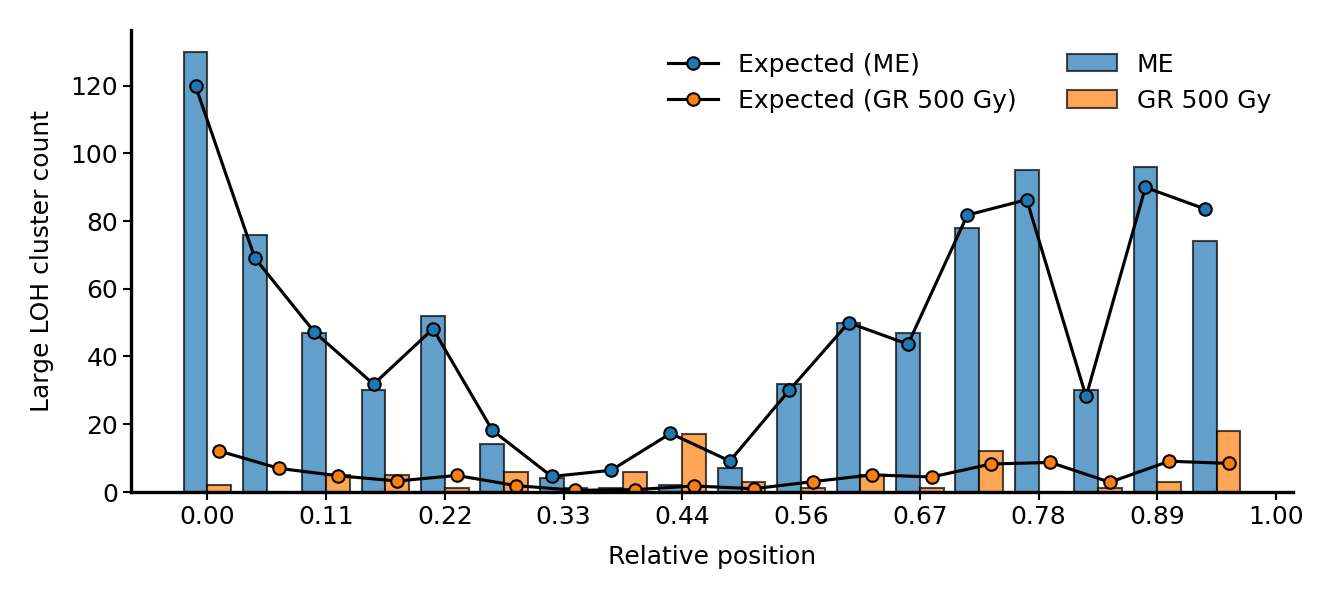

In [209]:
def binned_distribution_test(df1, df2, num_bins=18):
    # Create bins between 0.0 and 1.0
    bins = np.linspace(0, 1, num_bins + 1)
    # Digitize positions into bins
    bin_counts1, _ = np.histogram(df1['RELSTART'], bins=bins)
    bin_counts2, _ = np.histogram(df2['RELSTART'], bins=bins)
    # Combine the counts into a contingency table
    contingency_table = np.array([bin_counts1, bin_counts2])
    chi2_stat, p_value, _, expected = chi2_contingency(contingency_table)
    return chi2_stat, p_value, contingency_table, expected

# Perform the binned distribution test
# I used 18 bins to have at least one event per bin
chi2_stat, p_value, contingency_table, expected = binned_distribution_test(df1, df2)
print(f"Chi2 = {chi2_stat:.3f}, p = {p_value:.3e}")
print(contingency_table)
print(expected)

# Plotting the observed and expected frequencies for both conditions (after bin combining)
fig, ax = plt.subplots(figsize=(5, 2))
x = np.arange(len(contingency_table[0]))

ax.bar(x - 0.2, contingency_table[0], fc=ccycle[0]+"80", ec='k', lw=0.5, width=0.4, label='ME', alpha=0.7)
ax.bar(x + 0.2, contingency_table[1], fc=ccycle[1]+"80", ec='k', lw=0.5, width=0.4, label='GR 500 Gy', alpha=0.7)
ax.plot(x - 0.2, expected[0], color='k', mfc=ccycle[0], mec='k', mew=0.5, marker='.', lw=0.75, label='Expected (ME)')
ax.plot(x + 0.2, expected[1], color='k', mfc=ccycle[1], mec='k', mew=0.5, marker='.', lw=0.75, label='Expected (GR 500 Gy)')

print(x)
x_actual_values = np.linspace(0, 1, 18 + 1)
xticks = np.arange(0, 19, 2)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{x_actual_values[xi]:.2f}" for xi in xticks])

ax.set_xlabel("Relative position", fontsize=6)
ax.set_ylabel("Large LOH cluster count", fontsize=6)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(labelsize=6, width=0.5, length=2, pad=1)
ax.legend(fontsize=6, ncol=2, frameon=False)
plt.show()

# <--- UNUSED FIGURES --->

## Separated by chromosome

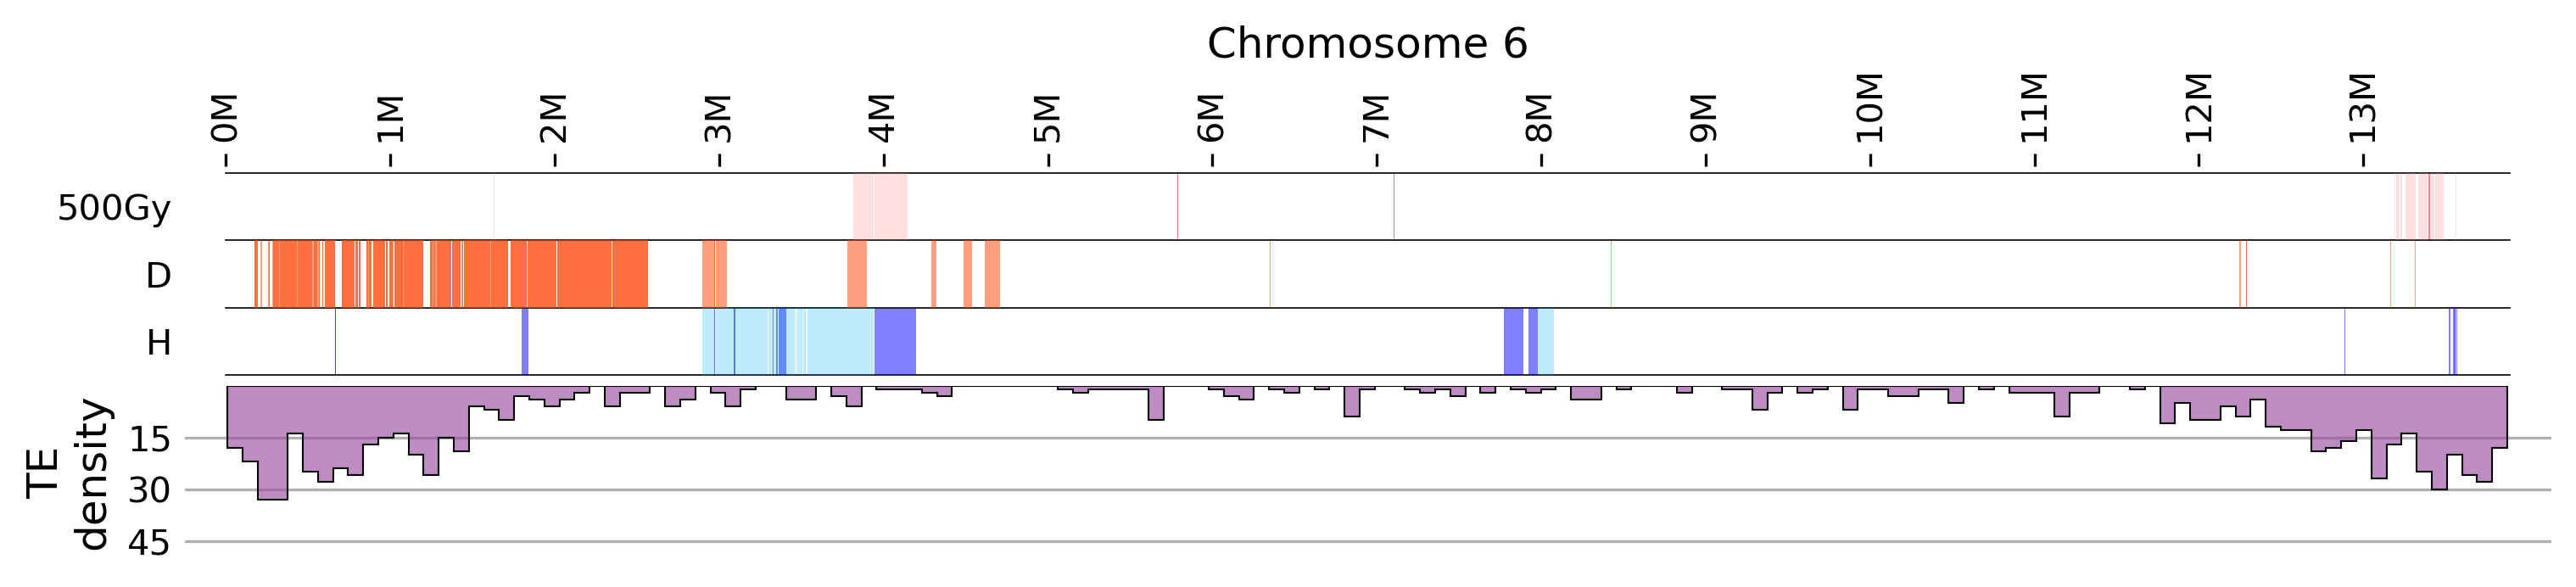

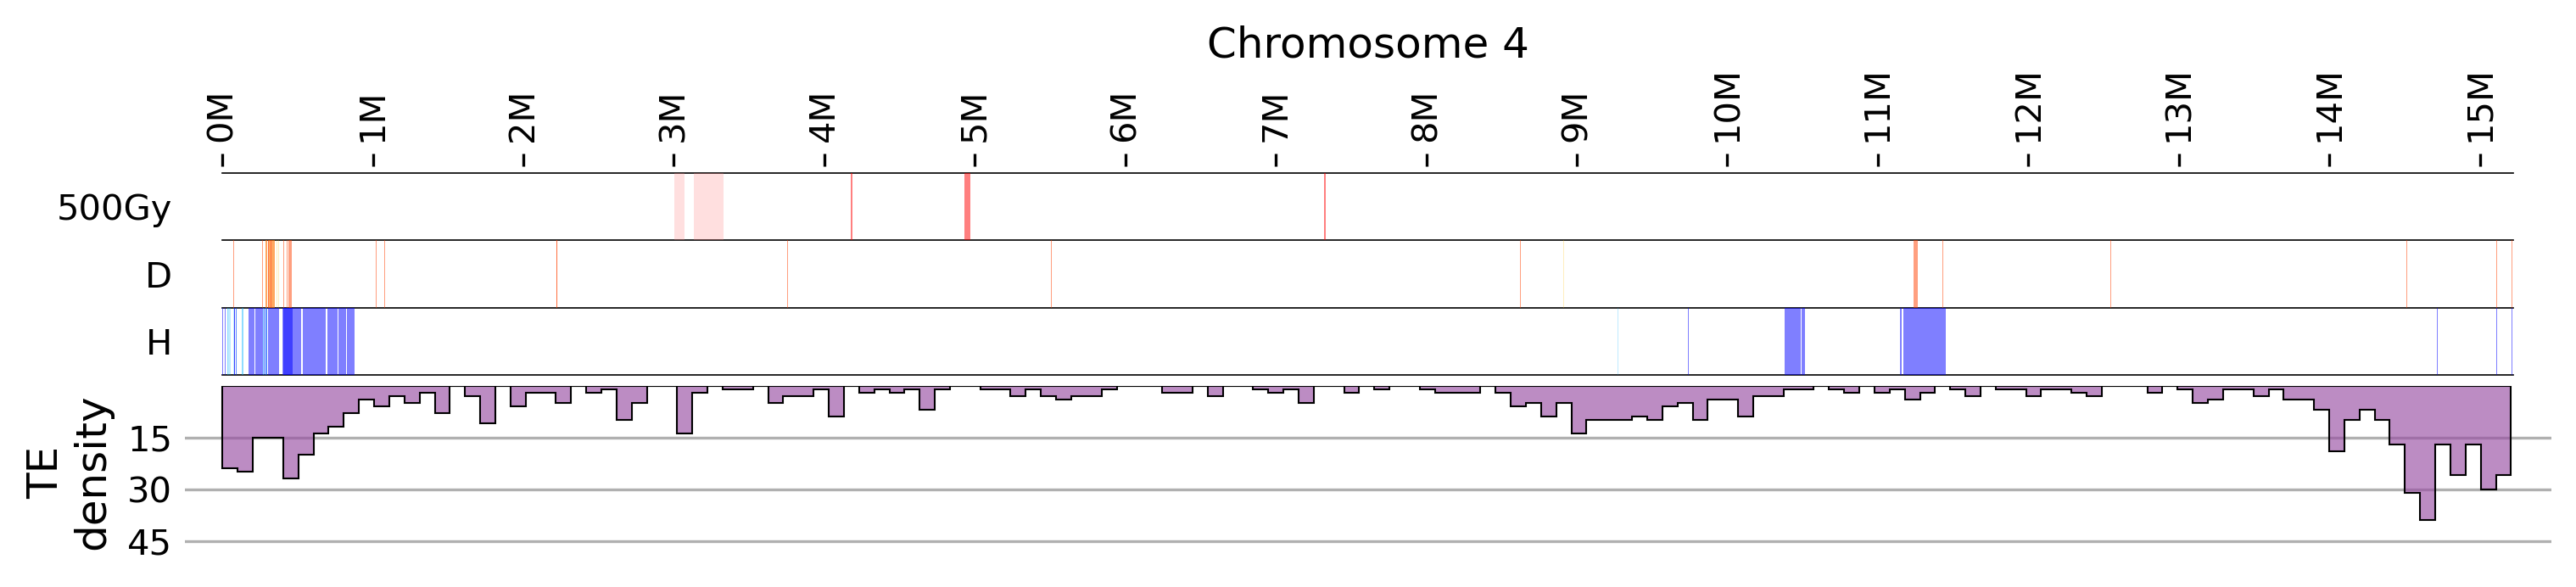

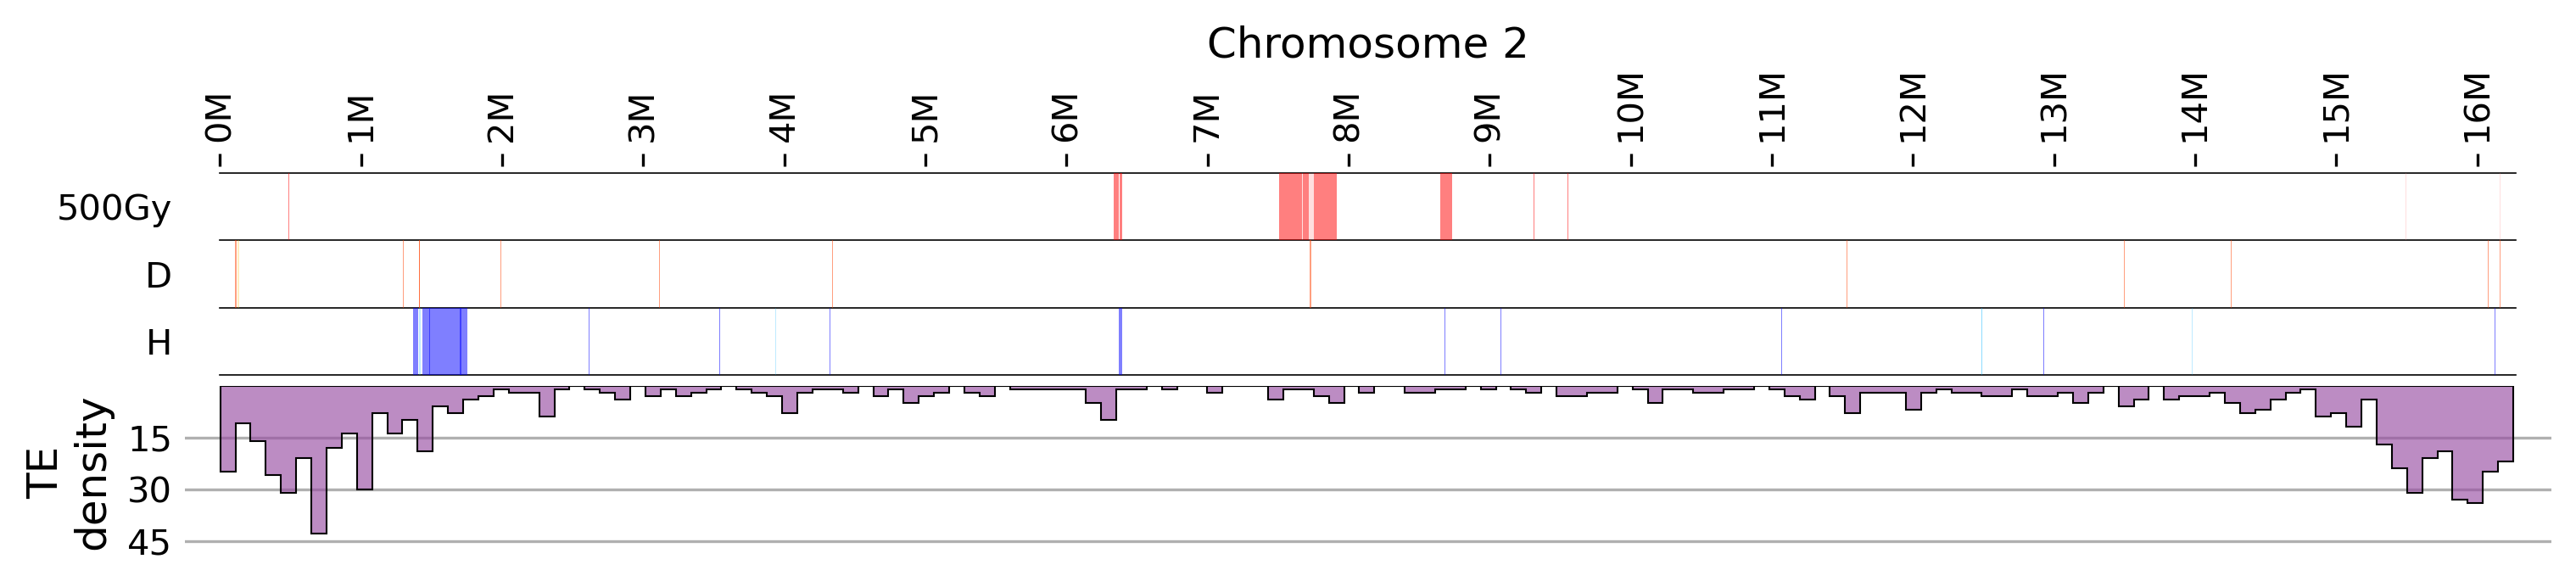

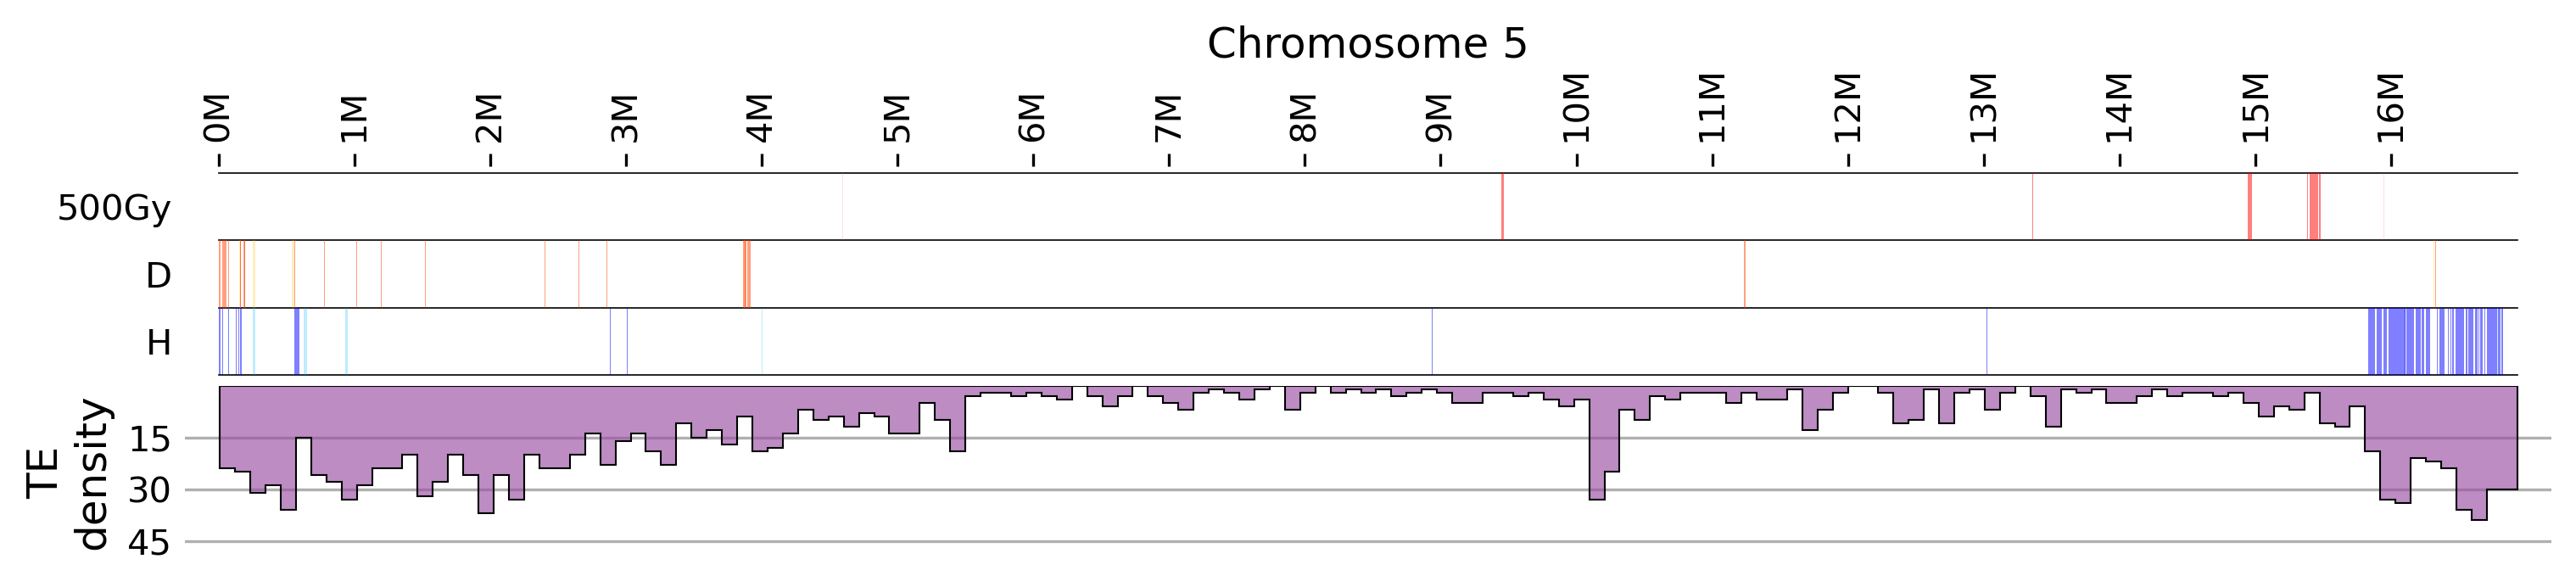

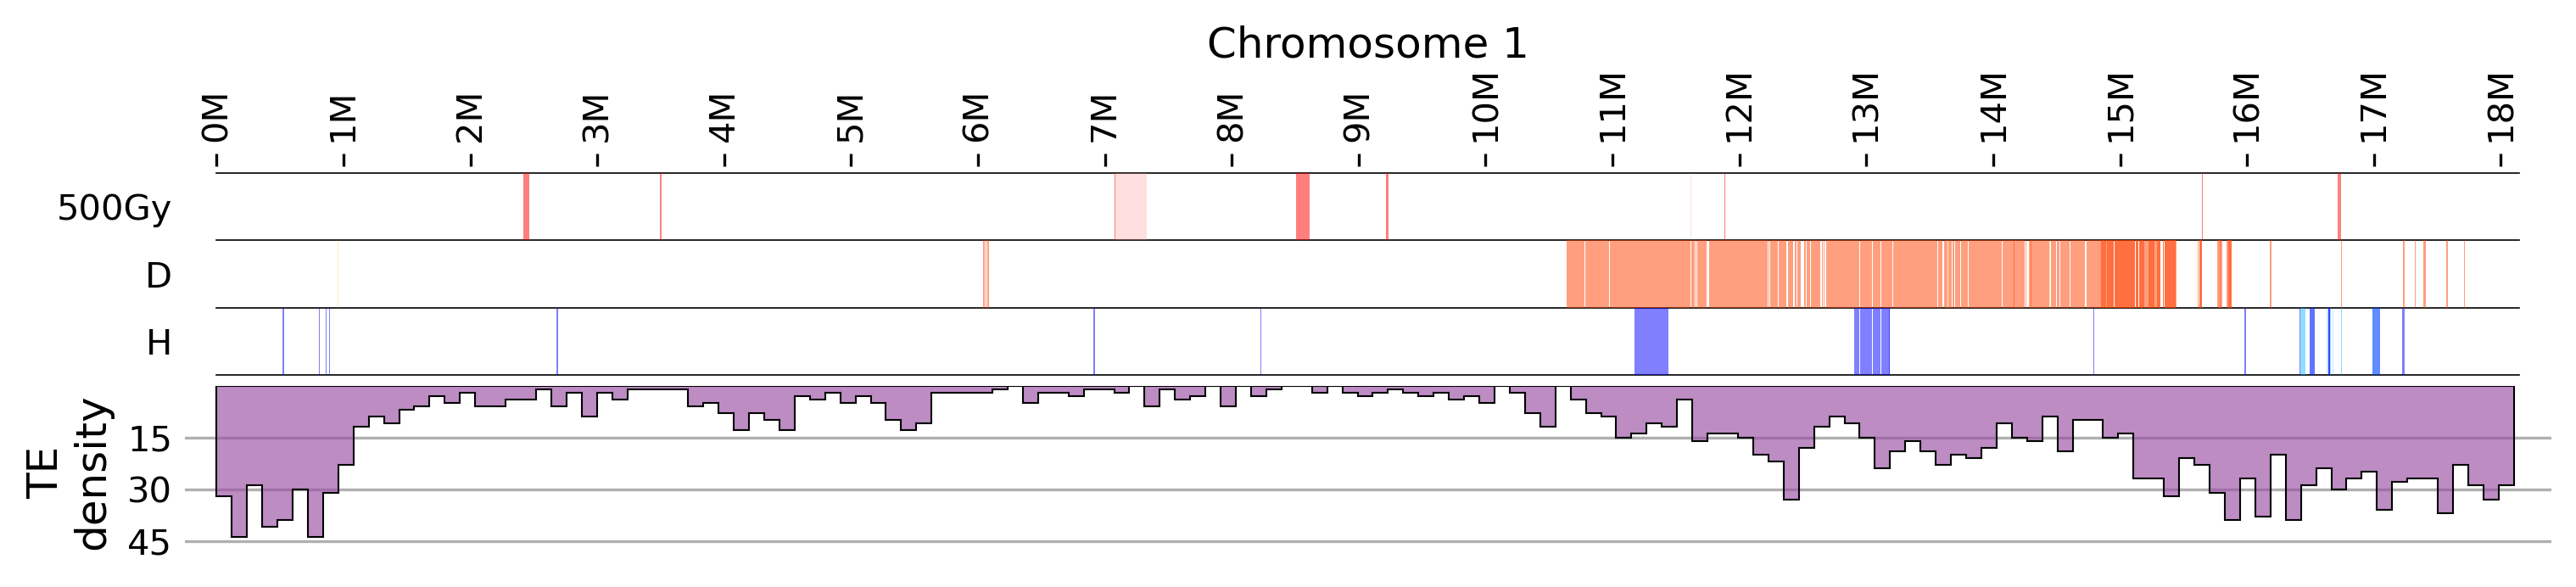

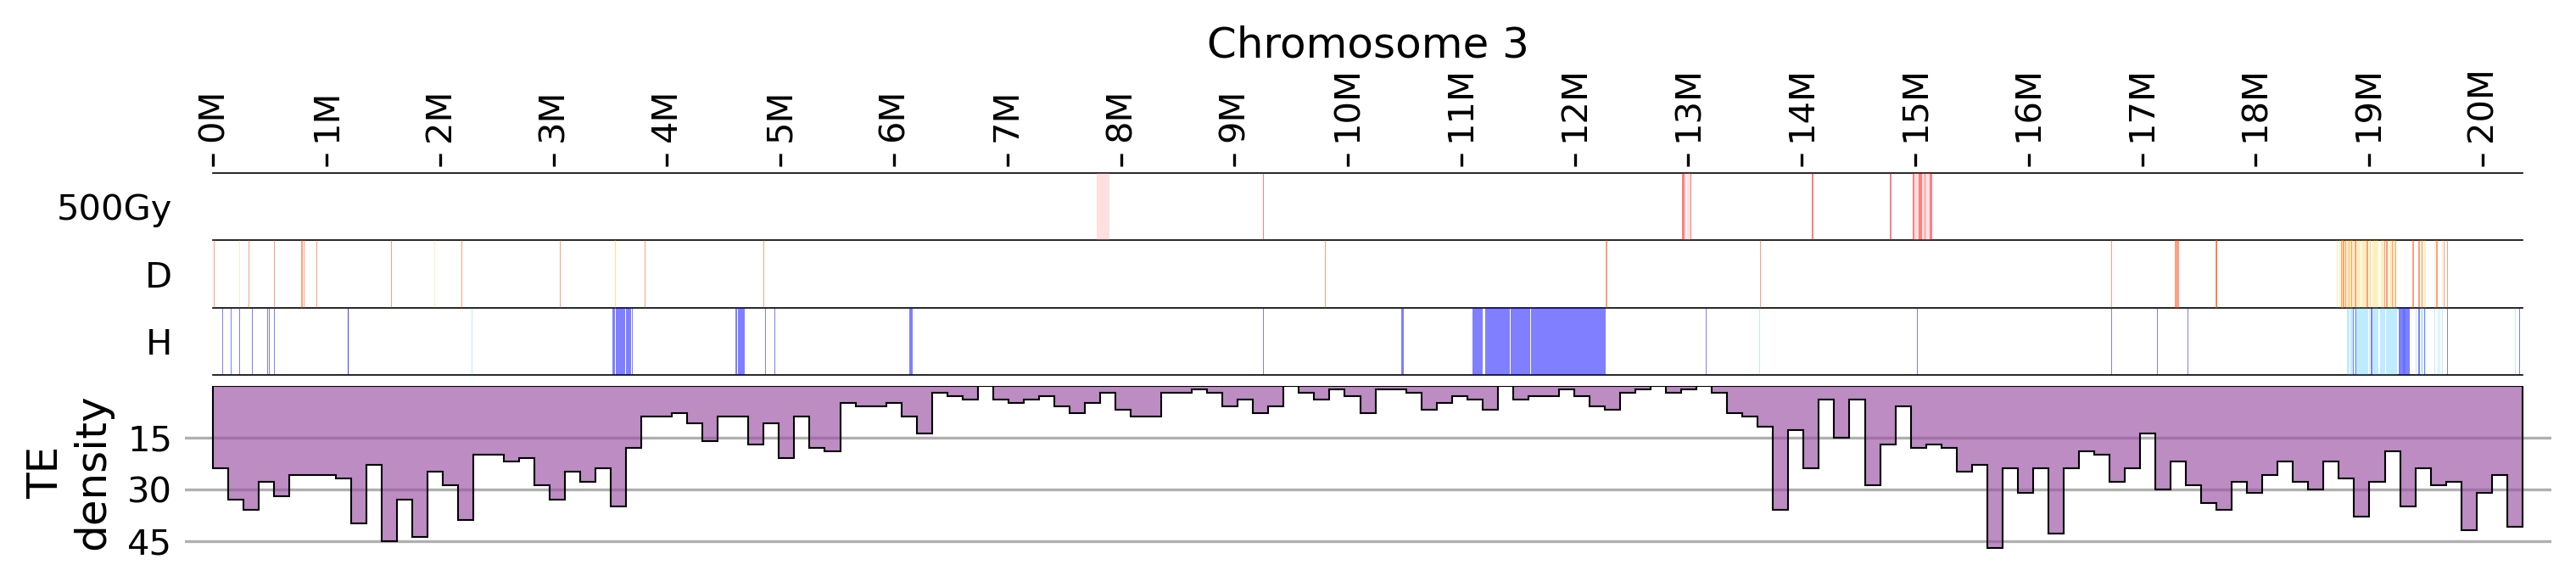

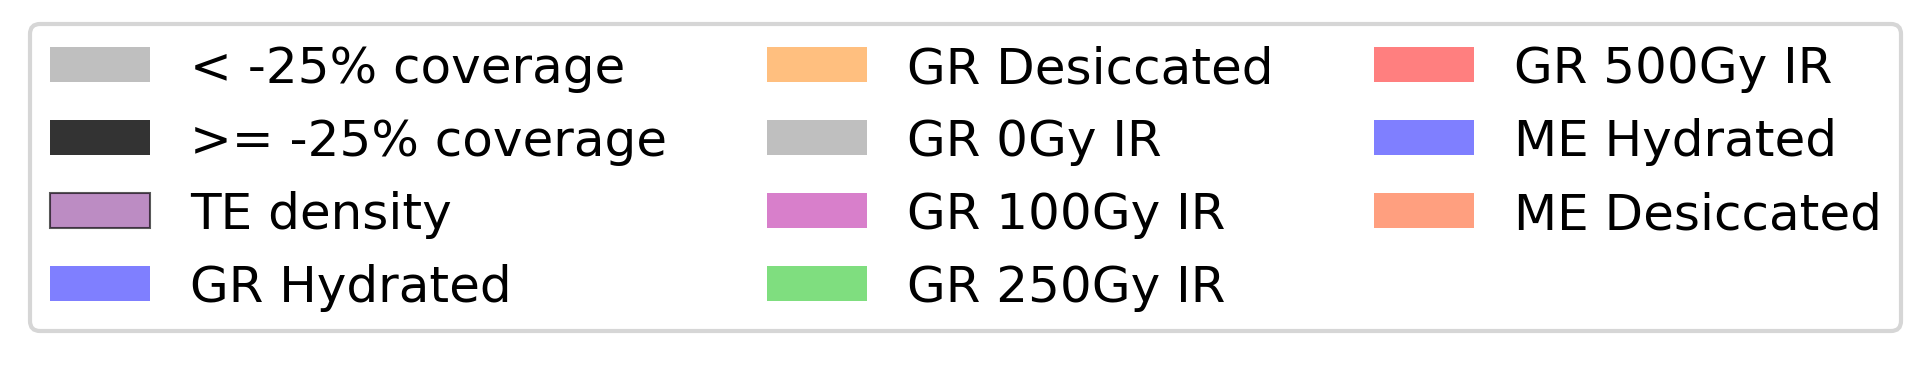

In [21]:
positions = {
    "Chrom_6":0,
    "Chrom_4":1,
    "Chrom_2":2,
    "Chrom_5":3,
    "Chrom_1":4,
    "Chrom_3":5,
}

ctgname = {
    "Chrom_6":"Chromosome 6",
    "Chrom_4":"Chromosome 4",
    "Chrom_2":"Chromosome 2",
    "Chrom_5":"Chromosome 5",
    "Chrom_1":"Chromosome 1",
    "Chrom_3":"Chromosome 3",
}

cond_y0 = {
    "H":-1,
    "D":0,
    "500Gy":1,
}

conditions_colors = {
    "30H": (0.0,0.0,1.0,0.8), # blue
    "30H_del": (0.0,0.7,1.0,0.25), # turquoise
    "30D": (1.0,0.5,0.0,0.8), # orangered
    "30D_del": (1.0,0.75,0.0,0.25), # orange
    "0Gy": (0.5,0.5,0.5,0.8), # dark grey
    "0Gy_del": (0.7,0.7,0.7,0.25), # lighter grey
    "100Gy": (0.7,0.0,0.6,0.8), # purple
    "100Gy_del": (1.0,0.0,0.8,0.25), # pinkish
    "250Gy": (0.0,0.75,0.0,0.8), # darkgreen
    "250Gy_del": (0.0,1.0,0.0,0.25), # limegreen
    "500Gy": (1.0,0.0,0.0,0.5), # red
    "500Gy_del": (1.0,0.5,0.5,0.25), # pink
    "H": (0.0,0.0,1.0,0.5),
    "H_del": (0.0,0.7,1.0,0.25),
    "D": (1.0,0.25,0.0,0.5),
    "D_del": (1.0,0.75,0.0,0.25),
}

for ctg, i in positions.items() :
    
    fig, axs = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=(12,2), gridspec_kw={"height_ratios":[5,4]})
    
    patches = []
    rect = Rectangle((0,-1), lengths[ctg], 3)
    patches.append(rect)
    
    rectangles = PatchCollection(patches, facecolor="none", alpha=1, ec="k", lw=0.0, zorder=8)
    outline = PatchCollection(patches, facecolor="none", alpha=1, ec="k", lw=0.0, zorder=15)
    
    ax = axs[0]
    
    ax.add_collection(rectangles)
    ax.add_collection(outline)
    
    ax.set_ylim(-1.1,2.1)
    
    ax.set_yticks([])
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_title(ctgname[ctg], pad=-5.0)
    #ax.tick_params(axis='x', which='major', top=True, labeltop=True)
    ax.xaxis.tick_top()

    ax.set_xlim(-250000, lengths[ctg]+250000)
    #ax.axis('on')
    xticksval = [i for i in range(0, lengths[ctg], 1000000)]
    ax.set_xticks(xticksval)
    ax.set_xticklabels([str(int(i/1000000))+"M" for i in xticksval], rotation="vertical")

    for i in range(-3,6) :
        ax.plot([0, lengths[ctg]], [i,i], lw=0.4, color="k")
    
    #ax.yaxis.tick_right()
    ax.set_yticks([-0.5,0.5,1.5])
    ax.set_yticklabels(["H","D","500Gy"])
    ax.tick_params(axis="y", length=0.0)
    
    for sample, cdf in all_dfs.items() :
        if sample_cond[sample] not in ["H", "D", "500Gy"] :
            continue
            
        chrom = cdf.loc[cdf["CHROM_first"] == ctg]
        chrom = chrom.assign(OPER=chrom.apply(lambda x: (x["ODP_mean"]/median_coverage[sample])*100, axis="columns"))
        chrom = chrom.assign(APER=chrom.apply(lambda x: (x["ADP_mean"]/median_coverage["ancestor"])*100, axis="columns"))
        chrom = chrom.assign(DIFF=chrom.apply(lambda x: x["OPER"]-x["APER"], axis="columns"))
        HR = chrom.query("DIFF >= -25")
        dele = chrom.query("DIFF < -25")
        
        # HR
        y0 = cond_y0[sample_cond[sample]]
        width = 1
        
        patches = []
        for n, row in HR.iterrows() :
            rect = Rectangle((row["POS_first"], y0), row["POS_last"]-row["POS_first"], width,)
            patches.append(rect)
            
        collection = PatchCollection(
            patches, facecolor=conditions_colors[sample_cond[sample]], 
            zorder=10, label="LOH"
        )
        ax.add_collection(collection)
        
        # Deletions
        patches = []
        for n, row in dele.iterrows() :
            rect = Rectangle((row["POS_first"], y0), row["POS_last"]-row["POS_first"], width,)
            patches.append(rect)
            
        collection = PatchCollection(
            patches, facecolor=conditions_colors[sample_cond[sample]+"_del"], 
            zorder=10, label="LOH"
        )
        ax.add_collection(collection)
        
    
    ax = axs[1]
    reps = repdf.loc[repdf["CHR"] == ctg]
    
    ax.hist(reps["START"], bins=151, ec="k", histtype="stepfilled", color=col_TE, lw=0.5, zorder=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    ax.set_xlim(-250000, lengths[ctg]+250000)
    ax.set_xticks([])
    ax.set_ylim(0,50)
    ax.set_yticks([15,30,45])
    ax.set_ylabel("TE\ndensity", fontsize=12)
    
    ax.tick_params(axis='y', which='major', length=0)
    
    ax.yaxis.grid(True, zorder=1)
    plt.setp(ax.get_xticklabels(), visible=False)
    #ax.tick_params(axis='x', which='major', labelsize=0, length=0)
    plt.setp(ax.get_xticklines(), visible=False)
    
    #ax.set_facecolor([0.985,0.985,0.985])
    
    plt.gca().invert_yaxis()
    
    ax = axs[0]
    ax.spines["top"].set_linewidth(0)
    ax.spines["left"].set_linewidth(0)
    
    ax = axs[1]
    ax.spines["left"].set_linewidth(0)
    
    fig.subplots_adjust(hspace=0.02)
    plt.show()

fig, ax = plt.subplots()

legend_elements = [
    Patch(facecolor="k", alpha=0.25, label="< -25% coverage"),
    Patch(facecolor="k", alpha=0.8, label=">= -25% coverage"),
    Patch(facecolor=col_TE, lw=0.5, ec="k", alpha=0.65, label="TE density"),
]
legend_elements += [Patch(facecolor=conditions_colors[cond], alpha=0.5, label=name) for cond, name in conditions_names.items()]
#legend_elements += [Patch(facecolor=conditions_colors[cond+"_del"], alpha=0.5, label=name + "Deletion") for cond, name in conditions_names.items()]

fig.legend(handles=legend_elements, loc="upper center", fontsize=12, ncol=3)

ax.set_visible(False)

#for axis in ['top','bottom','left','right']:

plt.show()